# Proyek Analisis Data: [E-Commerce Public Dataset]
- **Nama:** [Axel Zico Junior]
- **Email:** [axel.zicoj@gmail.com]
- **ID Dicoding:** [axelljunior]

## Menentukan Pertanyaan Bisnis

- Apa kategori produk yang memiliki harga rata-rata tertinggi dan terendah?
- Apa saja 10 kategori produk yang paling banyak dibeli di 5 kota teratas?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [107]:
customers_df = pd.read_csv('customers_dataset.csv')
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [108]:
order_df = pd.read_csv('orders_dataset.csv')
order_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [109]:
order_items_df = pd.read_csv('order_items_dataset.csv')
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [110]:
products_df = pd.read_csv('products_dataset.csv')
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [113]:
product_category_name_translation_df = pd.read_csv('product_category_name_translation.csv')
product_category_name_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


### **Insight:**
- Data anonim tidak memungkinkan kita untuk melihat apakah customer yang membeli produk pada bulan lalu adalah orang yang sama dengan yang membeli lagi bulan ini, yang membatasi upaya untuk memahami seberapa loyal pelanggan terhadap seller.
- Tanpa data yang lebih personal atau riwayat interaksi pengguna, sangat sulit untuk menyesuaikan rekomendasi produk atau penawaran yang relevan bagi pelanggan.

### Assessing Data

#### Menilai table `Customer_df`

In [114]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [115]:
customers_df.isna().sum()

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


In [116]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

Jumlah duplikasi:  0


In [117]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


#### Menilai table `Order_df`

In [118]:
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [119]:
order_df.nunique()

,0
order_id,99441
customer_id,99441
order_status,8
order_purchase_timestamp,98875
order_approved_at,90733
order_delivered_carrier_date,81018
order_delivered_customer_date,95664
order_estimated_delivery_date,459


In [120]:

print("Jumlah duplikasi: ",order_df.duplicated().sum())
order_df.describe()

Jumlah duplikasi:  0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


#### Menilai table `Order_items_df`

In [121]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [122]:
order_items_df.isna().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


In [123]:
print("Jumlah duplikasi: ", order_items_df.duplicated().sum())

Jumlah duplikasi:  0


In [124]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


#### Menilai table `Products_df`

In [125]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [126]:
print("Jumlah duplikasi: ", products_df.duplicated().sum())

products_df.describe()

Jumlah duplikasi:  0


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


### **Insight:**
- Tingkat kepercayaan pada produk dengan sedikit ulasan sulit untuk dinilai, sementara produk dengan banyak ulasan mungkin lebih bisa diandalkan dalam hal penilaian kualitas.
- Banyaknya rating 5 bintang bisa menunjukkan adanya bias dalam ulasan atau kemungkinan adanya ulasan palsu yang perlu diinvestigasi lebih lanjut.

### Cleaning Data

#### Membersihkan table `Customers_df`

In [133]:
customers_df.duplicated().sum()

0

In [134]:
# Menghapus kolom yang tidak penting
customers_df.drop(columns=['customer_unique_id'], inplace=True)

In [135]:
# Memastikan tidak ada duplikasi pada kolom `Customer_id`
if customers_df['customer_id'].nunique() == len(customers_df):
    print("Semua customer_id unik")
else:
    print("Ada duplikasi pada customer_id")

Semua customer_id unik


In [136]:
customers_df.head()

,customer_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,13056,campinas,SP


#### Membersihkan table `Order_df`

##### Menangani missing data

In [137]:
order_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [138]:
# Mengisi nilai kosong pada kolom 'order_approved_at' dengan 'order_purchase_timestamp'
order_df['order_approved_at'] = order_df['order_approved_at'].fillna(order_df['order_purchase_timestamp'])

##### Mengonversi tipe data yang berupa tanggal menjadi datetime

In [139]:
order_df.dtypes

,0
order_id,object
customer_id,object
order_status,object
order_purchase_timestamp,object
order_approved_at,object
order_delivered_carrier_date,object
order_delivered_customer_date,object
order_estimated_delivery_date,object


In [140]:
order_df['order_purchase_timestamp'] = pd.to_datetime(order_df['order_purchase_timestamp'], errors='coerce')
order_df['order_approved_at'] = pd.to_datetime(order_df['order_approved_at'], errors='coerce')
order_df['order_delivered_customer_date'] = pd.to_datetime(order_df['order_delivered_customer_date'], errors='coerce')
order_df['order_estimated_delivery_date'] = pd.to_datetime(order_df['order_estimated_delivery_date'], errors='coerce')
order_df['order_delivered_carrier_date'] = pd.to_datetime(order_df['order_delivered_carrier_date'], errors='coerce')

##### Mengonversi `order_status` menjadi kategori

In [141]:
order_df['order_status'] = order_df['order_status'].astype('category')

In [142]:
order_df.dtypes

,0
order_id,object
customer_id,object
order_status,category
order_purchase_timestamp,datetime64[ns]
order_approved_at,datetime64[ns]
order_delivered_carrier_date,datetime64[ns]
order_delivered_customer_date,datetime64[ns]
order_estimated_delivery_date,datetime64[ns]


#### Membersihkan table `Order_items_df`

In [143]:
order_items_df.dtypes

,0
order_id,object
order_item_id,int64
product_id,object
seller_id,object
shipping_limit_date,object
price,float64
freight_value,float64


In [144]:
# Mengonversi tipe data object yang berupa tanggal menjadi datetime
order_items_df['shipping_limit_date'] = pd.to_datetime(order_items_df['shipping_limit_date'], errors='coerce')

In [145]:
order_items_df.duplicated().sum()

0

In [146]:
order_items_df.describe()

,order_item_id,shipping_limit_date,price,freight_value
count,112650.000000,112650,112650.000000,112650.000000
mean,1.197834,2018-01-07 15:36:52.192685312,120.653739,19.990320
min,1.000000,2016-09-19 00:15:34,0.850000,0.000000
25%,1.000000,2017-09-20 20:57:27.500000,39.900000,13.080000
50%,1.000000,2018-01-26 13:59:35,74.990000,16.260000
75%,1.000000,2018-05-10 14:34:00.750000128,134.900000,21.150000
max,21.000000,2020-04-09 22:35:08,6735.000000,409.680000
std,0.705124,NaN,183.633928,15.806405


#### Membersihkan table `Product_df`

##### Menangani missing value

In [147]:
products_df.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [148]:
# Mengisi nilai kosong pada kolom `product_category_name` dengan 'Unknown'
products_df['product_category_name'].fillna('unknown', inplace=True)

<ipython-input-148-a383efb588de>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_df['product_category_name'].fillna('unknown', inplace=True)


In [149]:
# Mengisi missing data pada 'product_name_length' dan 'product_description_length' dengan median
products_df['product_name_lenght'] = products_df['product_name_lenght'].fillna(products_df['product_name_lenght'].median())
products_df['product_description_lenght'] = products_df['product_description_lenght'].fillna(products_df['product_description_lenght'].median())

In [150]:
# Mengisi missing data pada 'product_photos_qty' dengan 0
products_df['product_photos_qty'] = products_df['product_photos_qty'].fillna(0)

In [151]:
# Mengisi missing data dengan median (atau rata-rata jika lebih tepat)
products_df['product_weight_g'] = products_df['product_weight_g'].fillna(products_df['product_weight_g'].median())
products_df['product_length_cm'] = products_df['product_length_cm'].fillna(products_df['product_length_cm'].median())
products_df['product_height_cm'] = products_df['product_height_cm'].fillna(products_df['product_height_cm'].median())
products_df['product_width_cm'] = products_df['product_width_cm'].fillna(products_df['product_width_cm'].median())

In [152]:
products_df.dtypes

,0
product_id,object
product_category_name,object
product_name_lenght,float64
product_description_lenght,float64
product_photos_qty,float64
product_weight_g,float64
product_length_cm,float64
product_height_cm,float64
product_width_cm,float64


### **Insight:**
- Kehadiran dua kolom identifikasi pelanggan memperumit analisis agregat, seperti menghitung jumlah transaksi atau nilai total pembelian per pelanggan, karena tidak ada kejelasan tentang kolom mana yang lebih valid. Sehingga saya menghapus kolom Customers_unique_id.
- Menggunakan tipe data category pada kolom order_status mengurangi penggunaan memori secara signifikan. Sebagai contoh, jika ada ribuan status yang semuanya berupa string panjang, tipe category akan menggantinya dengan kode numerik yang lebih ringkas.

## Exploratory Data Analysis (EDA)

### Explore `Customers_df`

In [164]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_zip_code_prefix  99441 non-null  int64 
 2   customer_city             99441 non-null  object
 3   customer_state            99441 non-null  object
dtypes: int64(1), object(3)
memory usage: 3.0+ MB


In [156]:
customers_df.sample(5)

,customer_id,customer_zip_code_prefix,customer_city,customer_state
22509,2e9688dfc26193a7c2bbb6717beaa13e,37502,itajuba,MG
26626,917abca35fa6b3987e391741d948bac7,13323,salto,SP
29032,85d31ca96deb27c59bbb2485f64d658f,40390,salvador,BA
80266,589d137c275b6d5febd35a00f490e8bc,16750,rubiacea,SP
6479,9d880550e2b2258e195c8de278cf875e,68515,parauapebas,PA


In [157]:
customers_df.describe(include="all")

,customer_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441.000000,99441,99441
unique,99441,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,NaN,sao paulo,SP
freq,1,NaN,15540,41746
mean,NaN,35137.474583,NaN,NaN
std,NaN,29797.938996,NaN,NaN
min,NaN,1003.000000,NaN,NaN
25%,NaN,11347.000000,NaN,NaN
50%,NaN,24416.000000,NaN,NaN
75%,NaN,58900.000000,NaN,NaN


In [165]:
# Memeriksa distribusi frekuensi untuk kolom kategorikal
print(customers_df['customer_zip_code_prefix'].value_counts().head())
print(customers_df['customer_city'].value_counts().head())
print(customers_df['customer_state'].value_counts().head())

customer_zip_code_prefix
22790    142
24220    124
22793    121
24230    117
22775    110
Name: count, dtype: int64
customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
Name: count, dtype: int64
customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
Name: count, dtype: int64


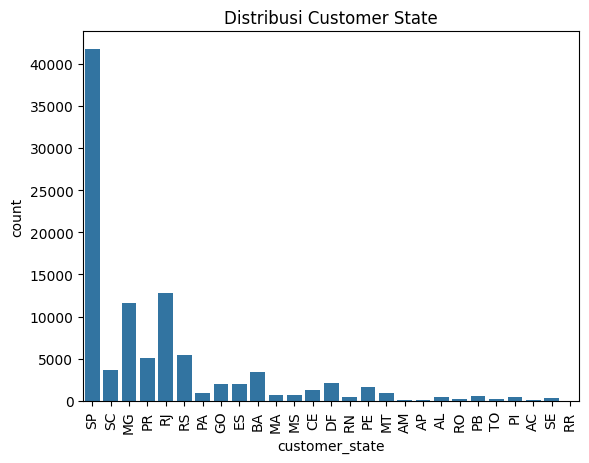

In [167]:
# Bar plot untuk distribusi customer_state
sns.countplot(x='customer_state', data=customers_df)
plt.title('Distribusi Customer State')
plt.xticks(rotation=90)
plt.show()

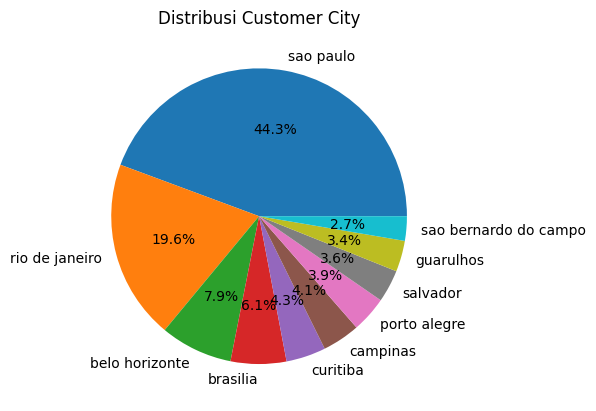

In [169]:
# Pie chart untuk distribusi customer_city
customers_df['customer_city'].value_counts().head(10).plot.pie(autopct='%1.1f%%')
plt.title('Distribusi Customer City')
plt.ylabel('')
plt.show()

In [170]:
# Memeriksa nilai unik di beberapa kolom
print(customers_df['customer_id'].nunique())
print(customers_df['customer_zip_code_prefix'].nunique())
print(customers_df['customer_city'].nunique())
print(customers_df['customer_state'].nunique())

99441
14994
4119
27


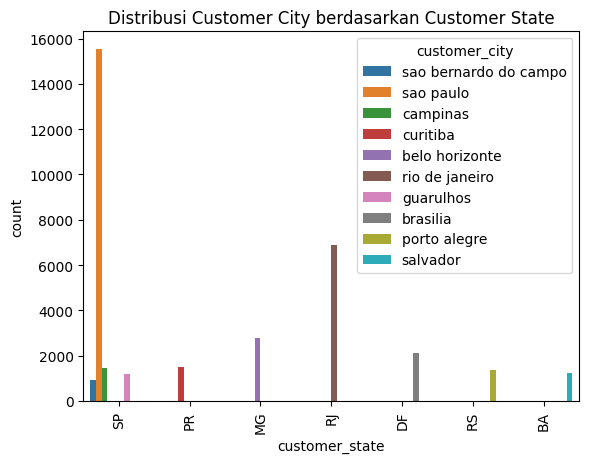

In [171]:
# Menghitung frekuensi setiap kota dan memilih kota yang paling sering muncul
top_cities = customers_df['customer_city'].value_counts().head(10).index

# Memfilter data hanya untuk kota-kota terpopuler
filtered_df = customers_df[customers_df['customer_city'].isin(top_cities)]

# Membuat plot dengan data yang sudah difilter
sns.countplot(x='customer_state', hue='customer_city', data=filtered_df)
plt.title('Distribusi Customer City berdasarkan Customer State')
plt.xticks(rotation=90)
plt.show()


### EXPLORE `order_df`

In [172]:
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  category      
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99441 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: category(1), datetime64[ns](5), object(2)
memory usage: 5.4+ MB


In [ ]:
order_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
44043,a2d2cba2241c7e5f2de7e9e3ed12250b,641572a061cb58aa1e035fed93eb8ac7,delivered,2018-03-10 03:25:22,2018-03-10 04:10:48,2018-03-14 00:51:38,2018-03-16 02:33:26,2018-03-22
72042,ae11d192084ba3db24965f271590124d,48f604f54860c1cb6d76ad2a8217ff4d,delivered,2018-03-01 15:16:26,2018-03-01 15:35:55,2018-03-02 01:17:58,2018-04-12 13:20:55,2018-03-19
34278,51ff4a10777aeb7e9a0e28f9c5211ec8,4ceff68d9954da5a2b1b42a4ce0e0064,delivered,2018-01-10 21:44:01,2018-01-11 02:39:36,2018-01-15 17:47:55,2018-01-23 19:59:54,2018-02-02
21236,1190d4d9e67a90f9de44a7db2a0ceb52,02dd0797daa7b1b91de2b24bd6dfbba3,delivered,2017-04-20 22:05:41,2017-04-20 22:41:24,2017-04-22 08:41:44,2017-05-03 12:05:43,2017-05-10
66902,9ba31b95aa2ad7ab24bcd9f64a89ea43,8965a99bf5b3c17a1669d8ed1c31b9a3,delivered,2017-10-04 15:51:35,2017-10-04 16:07:45,2017-10-05 20:04:14,2017-10-11 17:00:24,2017-10-31


In [ ]:
order_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99441,97658,96476,99441
unique,99441,99441,8,NaN,NaN,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN
freq,1,1,96478,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,2017-12-31 19:07:21.164720896,2018-01-04 21:49:48.138278656,2018-01-14 12:09:19.035542272,2018-01-24 03:08:37.730111232
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
25%,NaN,NaN,NaN,2017-09-12 14:46:19,2017-09-12 21:55:13,2017-09-15 22:28:50.249999872,2017-09-25 22:07:22.249999872,2017-10-03 00:00:00
50%,NaN,NaN,NaN,2018-01-18 23:04:36,2018-01-19 11:54:30,2018-01-24 16:10:58,2018-02-02 19:28:10.500000,2018-02-15 00:00:00
75%,NaN,NaN,NaN,2018-05-04 15:42:16,2018-05-04 23:50:21,2018-05-08 13:37:45,2018-05-15 22:48:52.249999872,2018-05-25 00:00:00
max,NaN,NaN,NaN,2018-10-17 17:30:18,2018-10-17 17:30:18,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


In [174]:
# Memeriksa distribusi frekuensi untuk kolom kategorikal
print(order_df['order_status'].value_counts())


order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64


In [176]:
order_df['order_purchase_timestamp'] = pd.to_datetime(order_df['order_purchase_timestamp'])
order_df['order_approved_at'] = pd.to_datetime(order_df['order_approved_at'])
order_df['order_delivered_carrier_date'] = pd.to_datetime(order_df['order_delivered_carrier_date'])
order_df['order_delivered_customer_date'] = pd.to_datetime(order_df['order_delivered_customer_date'])
order_df['order_estimated_delivery_date'] = pd.to_datetime(order_df['order_estimated_delivery_date'])

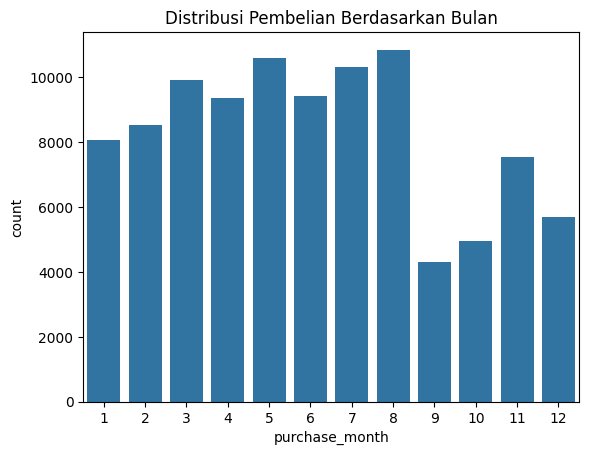

In [178]:
# Menambahkan kolom baru untuk hari, bulan, dan tahun
order_df['purchase_day'] = order_df['order_purchase_timestamp'].dt.dayofweek
order_df['purchase_month'] = order_df['order_purchase_timestamp'].dt.month
order_df['purchase_year'] = order_df['order_purchase_timestamp'].dt.year

# Visualisasi distribusi pembelian berdasarkan bulan
sns.countplot(x='purchase_month', data=order_df)
plt.title('Distribusi Pembelian Berdasarkan Bulan')
plt.show()

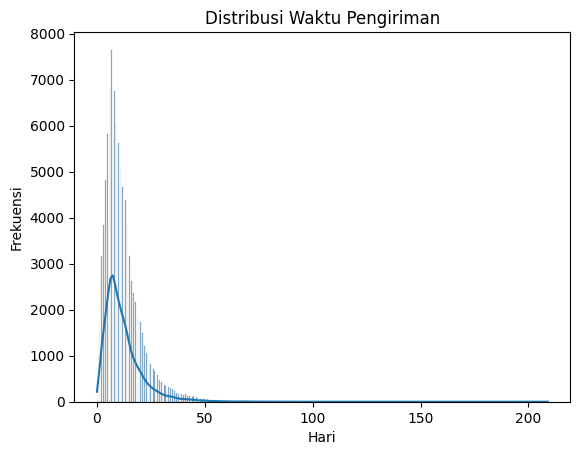

In [179]:
# Menghitung selisih waktu antara order_purchase_timestamp dan order_delivered_customer_date
order_df['delivery_time'] = (order_df['order_delivered_customer_date'] - order_df['order_purchase_timestamp']).dt.days

# Visualisasi lama waktu pengiriman
sns.histplot(order_df['delivery_time'], kde=True)
plt.title('Distribusi Waktu Pengiriman')
plt.xlabel('Hari')
plt.ylabel('Frekuensi')
plt.show()


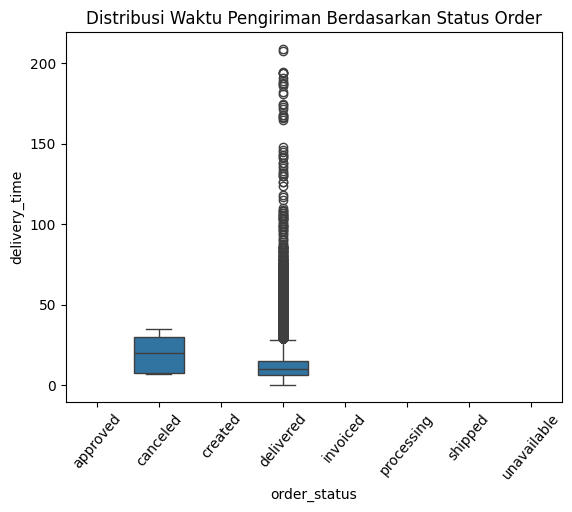

In [186]:
# Boxplot distribusi delivery_time berdasarkan order_status
sns.boxplot(x='order_status', y='delivery_time', data=order_df)
plt.title('Distribusi Waktu Pengiriman Berdasarkan Status Order')
plt.xticks(rotation=50)
plt.show()


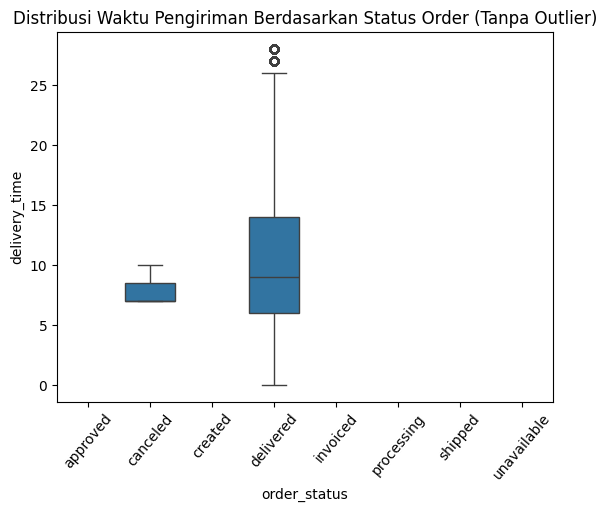

In [185]:
# Menghitung IQR (Interquartile Range)
Q1 = order_df['delivery_time'].quantile(0.25)
Q3 = order_df['delivery_time'].quantile(0.75)
IQR = Q3 - Q1

# Menyaring data yang berada dalam batas IQR
filtered_df = order_df[(order_df['delivery_time'] >= Q1 - 1.5 * IQR) & (order_df['delivery_time'] <= Q3 + 1.5 * IQR)]

# Membuat boxplot dengan data yang sudah difilter
sns.boxplot(x='order_status', y='delivery_time', data=filtered_df)
plt.xticks(rotation=50)
plt.title('Distribusi Waktu Pengiriman Berdasarkan Status Order (Tanpa Outlier)')
plt.show()


In [188]:
# Persentase status order
order_status_percent = order_df['order_status'].value_counts(normalize=True) * 100
print(order_status_percent)


order_status
delivered      97.020344
shipped         1.113223
canceled        0.628513
unavailable     0.612423
invoiced        0.315765
processing      0.302692
created         0.005028
approved        0.002011
Name: proportion, dtype: float64


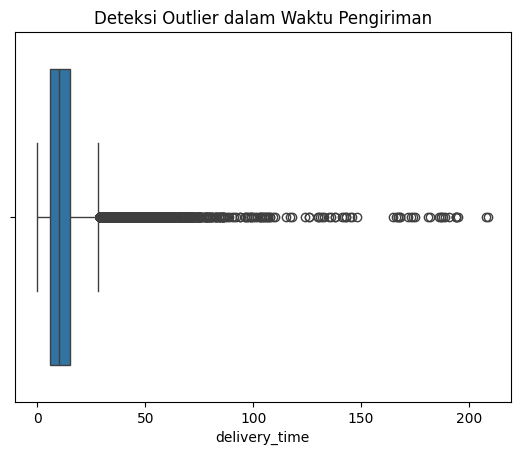

In [189]:
# Boxplot untuk mendeteksi outlier dalam delivery_time
sns.boxplot(x=order_df['delivery_time'])
plt.title('Deteksi Outlier dalam Waktu Pengiriman')
plt.show()


### EXPLORE `Customers_df` dan `Order_df`

In [191]:
orders_customers_df = pd.merge(
    left=order_df,
    right=customers_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
orders_customers_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchase_day,purchase_month,purchase_year,delivery_time,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,0,10,2017,8.0,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,7,2018,13.0,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2,8,2018,9.0,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,5,11,2017,13.0,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1,2,2018,2.0,9195,santo andre,SP


In [193]:
orders_customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  category      
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99441 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
 8   purchase_day                   99441 non-null  int32         
 9   purchase_month                 99441 non-null  int32         
 10  purchase_year                  99441 non-null  int32         
 11  delivery_time  

In [192]:
orders_customers_df.describe()

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchase_day,purchase_month,purchase_year,delivery_time,customer_zip_code_prefix
count,99441,99441,97658,96476,99441,99441.000000,99441.000000,99441.000000,96476.000000,99441.000000
mean,2017-12-31 08:43:12.776581120,2017-12-31 19:07:21.164720896,2018-01-04 21:49:48.138278656,2018-01-14 12:09:19.035542272,2018-01-24 03:08:37.730111232,2.755735,6.032220,2017.539838,12.094086,35137.474583
min,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00,0.000000,1.000000,2016.000000,0.000000,1003.000000
25%,2017-09-12 14:46:19,2017-09-12 21:55:13,2017-09-15 22:28:50.249999872,2017-09-25 22:07:22.249999872,2017-10-03 00:00:00,1.000000,3.000000,2017.000000,6.000000,11347.000000
50%,2018-01-18 23:04:36,2018-01-19 11:54:30,2018-01-24 16:10:58,2018-02-02 19:28:10.500000,2018-02-15 00:00:00,3.000000,6.000000,2018.000000,10.000000,24416.000000
75%,2018-05-04 15:42:16,2018-05-04 23:50:21,2018-05-08 13:37:45,2018-05-15 22:48:52.249999872,2018-05-25 00:00:00,4.000000,8.000000,2018.000000,15.000000,58900.000000
max,2018-10-17 17:30:18,2018-10-17 17:30:18,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00,6.000000,12.000000,2018.000000,209.000000,99990.000000
std,NaN,NaN,NaN,NaN,NaN,1.966495,3.232999,0.505007,9.551746,29797.938996


In [194]:
# Memeriksa distribusi frekuensi untuk kolom kategorikal
print(orders_customers_df['order_status'].value_counts())  # Distribusi status pesanan
print(orders_customers_df['customer_city'].value_counts().head())  # 10 kota teratas
print(orders_customers_df['customer_state'].value_counts())  # Distribusi status pesanan


order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64
customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
Name: count, dtype: int64
customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: count, dtype: int64


                purchase_year  purchase_month  delivery_time
purchase_year        1.000000       -0.550059      -0.050156
purchase_month      -0.550059        1.000000      -0.054398
delivery_time       -0.050156       -0.054398       1.000000


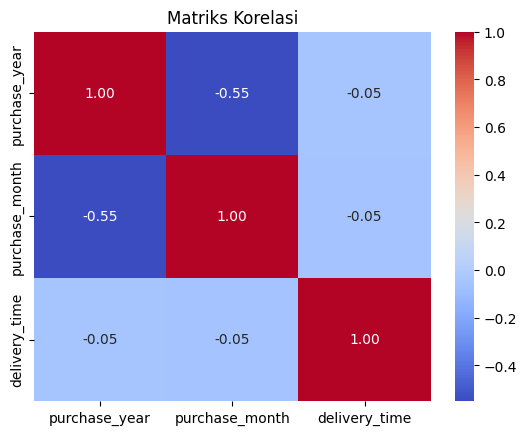

In [198]:
# Korelasi antar kolom numerik
corr = orders_customers_df[['purchase_year', 'purchase_month', 'delivery_time']].corr()
print(corr)

# Visualisasi korelasi dengan heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriks Korelasi')
plt.show()


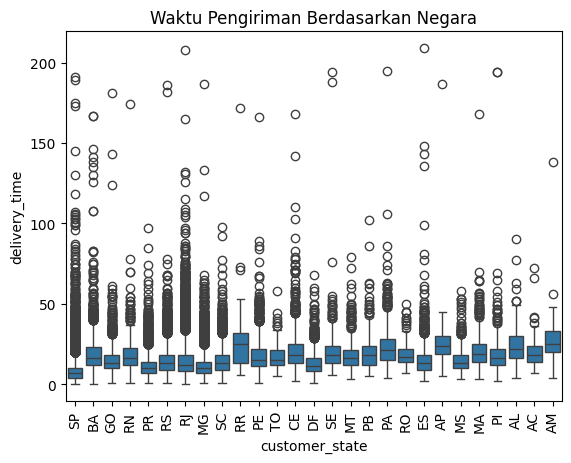

In [201]:
# Boxplot distribusi waktu pengiriman berdasarkan customer_state
sns.boxplot(x='customer_state', y='delivery_time', data=orders_customers_df)
plt.title('Waktu Pengiriman Berdasarkan Negara')
plt.xticks(rotation=90)
plt.show()




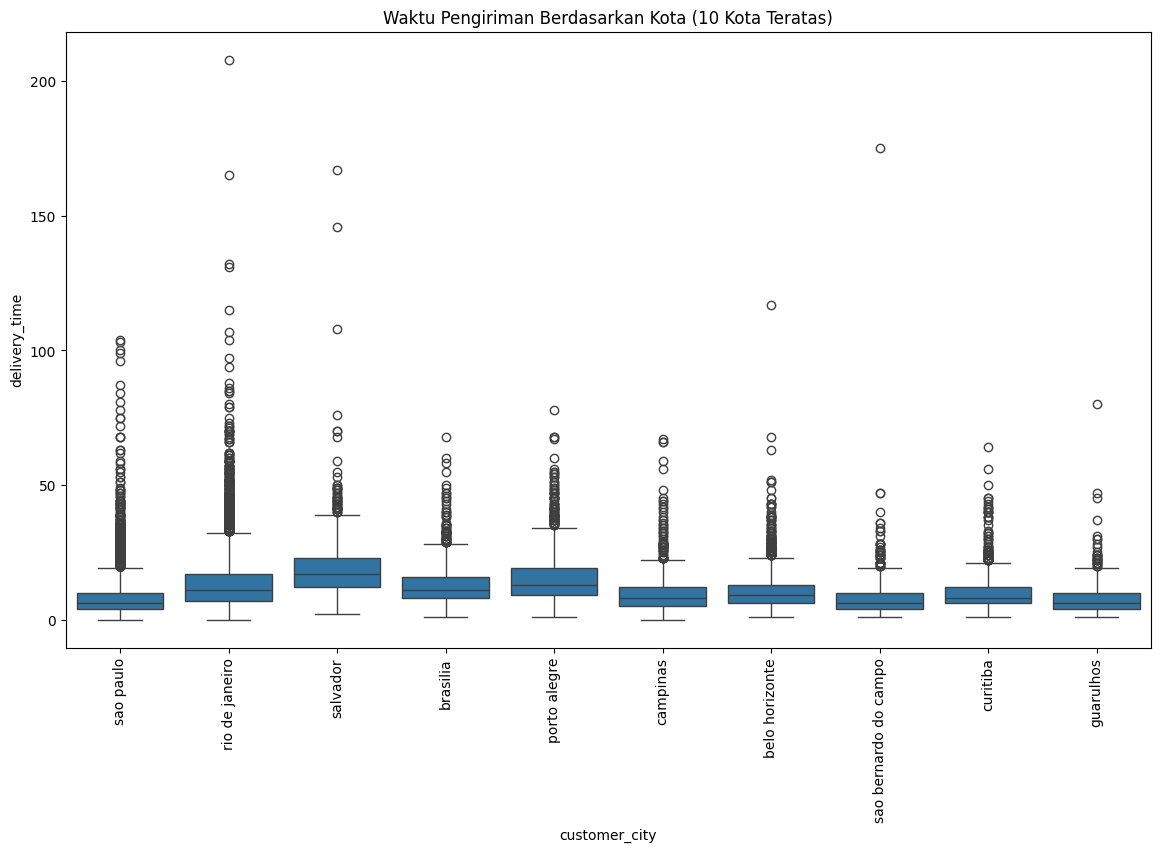

In [206]:
# Menghitung jumlah pesanan per kota
top_cities = orders_customers_df['customer_city'].value_counts().head(10).index

# Memilih data untuk 10 kota teratas
filtered_df = orders_customers_df[orders_customers_df['customer_city'].isin(top_cities)]

# Membuat boxplot
plt.figure(figsize=(14, 8))  # Menyesuaikan ukuran plot agar lebih jelas
sns.boxplot(x='customer_city', y='delivery_time', data=filtered_df)

# Menambahkan judul
plt.title('Waktu Pengiriman Berdasarkan Kota (10 Kota Teratas)')

# Memutar label sumbu x agar lebih mudah dibaca
plt.xticks(rotation=90)

# Menampilkan plot
plt.show()


In [204]:
# Menghitung apakah pengiriman tepat waktu
orders_customers_df['on_time_delivery'] = (orders_customers_df['order_delivered_customer_date'] <= orders_customers_df['order_estimated_delivery_date']).astype(int)

# Persentase pengiriman tepat waktu
on_time_percent = orders_customers_df['on_time_delivery'].mean() * 100
print(f"Persentase Pengiriman Tepat Waktu: {on_time_percent:.2f}%")


Persentase Pengiriman Tepat Waktu: 89.15%


In [210]:
# Persentase order_status
order_status_percent = orders_customers_df['order_status'].value_counts(normalize=True) * 100
print(order_status_percent)


order_status
delivered      97.020344
shipped         1.113223
canceled        0.628513
unavailable     0.612423
invoiced        0.315765
processing      0.302692
created         0.005028
approved        0.002011
Name: proportion, dtype: float64


In [ ]:
orders_customers_df.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False).head(10)

,order_id
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
campinas,1444
porto alegre,1379
salvador,1245
guarulhos,1189


In [ ]:
orders_customers_df.groupby(by="customer_state").order_id.nunique().sort_values(ascending=False)

,order_id
customer_state,
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045
SC,3637
BA,3380
DF,2140
ES,2033


### EXPLORE `products_df`

In [ ]:
products_df.sample(10)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
26736,c4fc1d4489f664ce1c6c55b7089738b2,fashion_bolsas_e_acessorios,59.0,409.0,3.0,150.0,16.0,9.0,20.0
11425,a99174c837d1b8203f4122716c1d2d1a,automotivo,60.0,1403.0,2.0,200.0,20.0,4.0,16.0
1358,51fe26bc4bb0f89f07096d8c96b35476,unknown,51.0,595.0,0.0,200.0,16.0,2.0,11.0
23177,2077f60cc760ebe4b478e0b0711c5218,brinquedos,49.0,1479.0,2.0,1100.0,30.0,7.0,23.0
21091,24fcd474105d95d2002f38f0cacf87ee,automotivo,48.0,62.0,1.0,700.0,16.0,7.0,11.0
723,c293414ca6dacfb6085739783def4ef6,brinquedos,52.0,706.0,4.0,2450.0,23.0,7.0,23.0
1249,794c86fac605d182da0e2e7965c047f6,consoles_games,23.0,1537.0,1.0,200.0,21.0,5.0,14.0
1195,7e3c3f51d5ccc2382147194f911e22a8,fashion_calcados,42.0,649.0,3.0,700.0,16.0,8.0,18.0
23643,67301eee7b845f54ee9df341fb8393de,eletronicos,41.0,401.0,1.0,125.0,22.0,11.0,16.0
19639,7b0c4d9da2e7edd82a2ee63609d09c69,papelaria,43.0,152.0,2.0,1700.0,35.0,45.0,16.0


In [211]:
df_merged = pd.merge(products_df, product_category_name_translation_df, on='product_category_name', how='left')
df_merged['product_category_name'] = df_merged['product_category_name_english']
df_merged.drop('product_category_name_english', axis=1, inplace=True)

In [212]:
df_merged.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [213]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32328 non-null  object 
 2   product_name_lenght         32951 non-null  float64
 3   product_description_lenght  32951 non-null  float64
 4   product_photos_qty          32951 non-null  float64
 5   product_weight_g            32951 non-null  float64
 6   product_length_cm           32951 non-null  float64
 7   product_height_cm           32951 non-null  float64
 8   product_width_cm            32951 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [ ]:
df_merged.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000
mean,48.523656,768.227945,2.148463,2276.376802,30.814725,16.937422,23.196534
std,10.156155,629.658469,1.745732,4281.926387,16.914005,13.637175,12.078707
min,5.000000,4.000000,0.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,344.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,961.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [214]:
# Memeriksa distribusi frekuensi untuk kolom kategorikal
print(df_merged['product_category_name'].value_counts())


product_category_name
bed_bath_table               3029
sports_leisure               2867
furniture_decor              2657
health_beauty                2444
housewares                   2335
                             ... 
tablets_printing_image          9
fashion_childrens_clothes       5
home_comfort_2                  5
security_and_services           2
cds_dvds_musicals               1
Name: count, Length: 71, dtype: int64


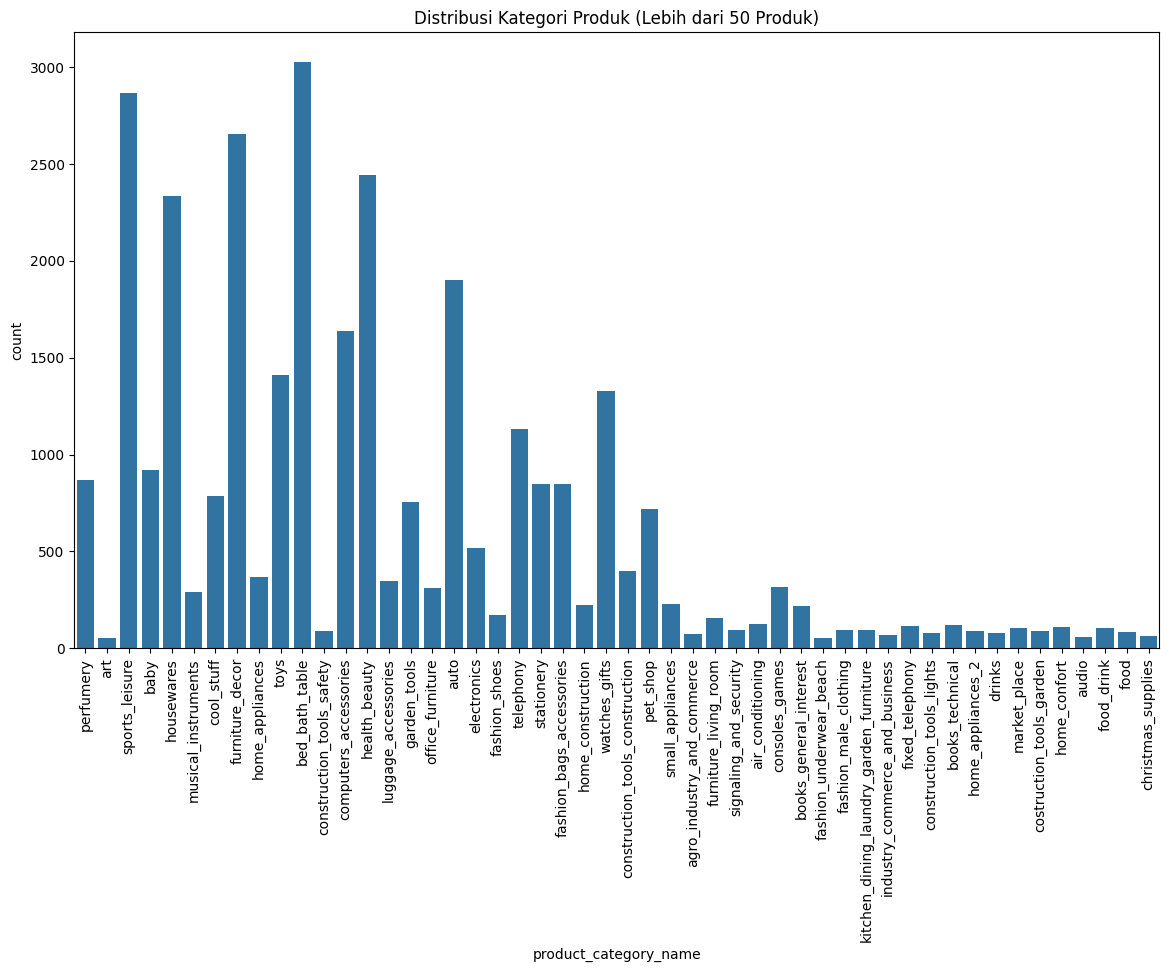

In [217]:
# Menghitung jumlah produk per kategori dan menyaring yang memiliki lebih dari 50 produk
category_counts = df_merged['product_category_name'].value_counts()
filtered_categories = category_counts[category_counts > 50].index

# Memilih data untuk kategori yang memiliki lebih dari 50 produk
filtered_df = df_merged[df_merged['product_category_name'].isin(filtered_categories)]

# Membuat countplot
plt.figure(figsize=(14, 8))
sns.countplot(x='product_category_name', data=filtered_df)

# Menambahkan judul dan memutar label sumbu x agar lebih mudah dibaca
plt.title('Distribusi Kategori Produk (Lebih dari 50 Produk)')
plt.xticks(rotation=90)
plt.show()


                            product_name_lenght  product_description_lenght  \
product_name_lenght                    1.000000                    0.097350   
product_description_lenght             0.097350                    1.000000   
product_photos_qty                     0.126654                    0.113490   
product_weight_g                       0.044152                    0.061814   
product_length_cm                      0.079374                    0.035228   
product_height_cm                     -0.016720                    0.063305   
product_width_cm                       0.069791                   -0.030288   

                            product_photos_qty  product_weight_g  \
product_name_lenght                   0.126654          0.044152   
product_description_lenght            0.113490          0.061814   
product_photos_qty                    1.000000          0.035803   
product_weight_g                      0.035803          1.000000   
product_length_cm          

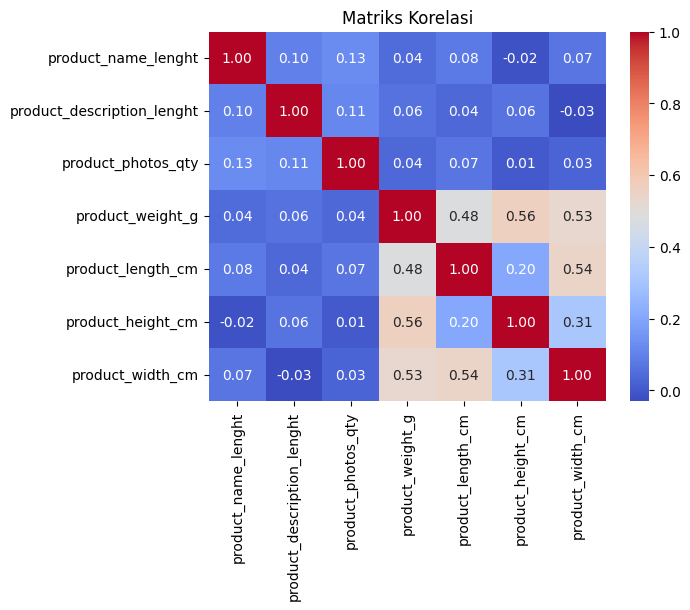

In [218]:
# Memeriksa korelasi antar kolom numerik
corr = df_merged[['product_name_lenght', 'product_description_lenght', 'product_photos_qty',
           'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']].corr()
print(corr)

# Visualisasi korelasi dengan heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriks Korelasi')
plt.show()


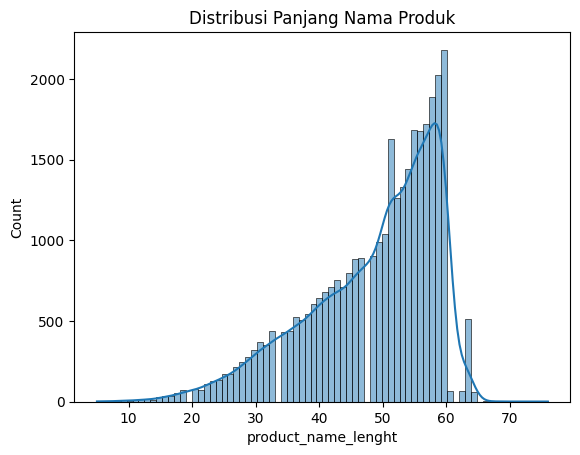

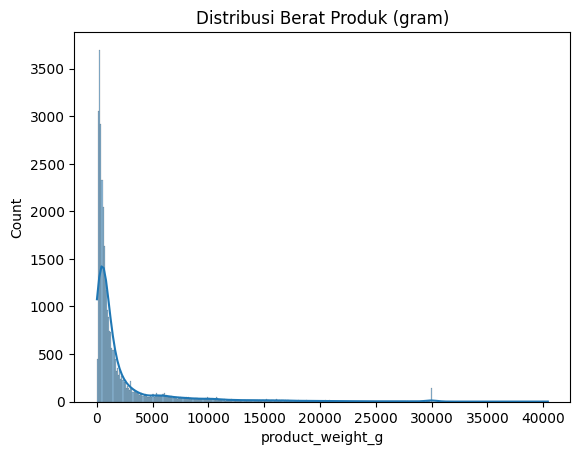

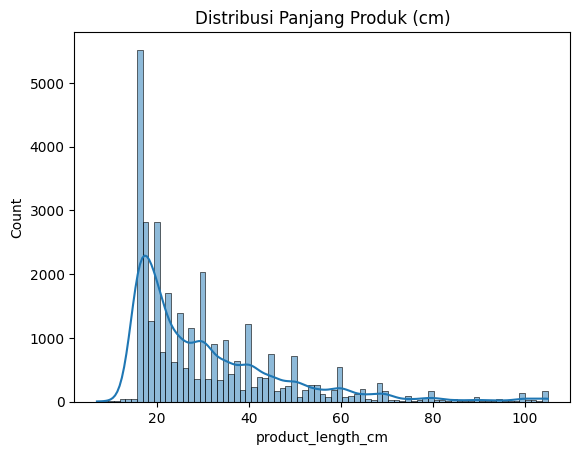

In [219]:
# Visualisasi distribusi panjang nama produk
sns.histplot(df_merged['product_name_lenght'], kde=True)
plt.title('Distribusi Panjang Nama Produk')
plt.show()

# Visualisasi distribusi berat produk
sns.histplot(df_merged['product_weight_g'], kde=True)
plt.title('Distribusi Berat Produk (gram)')
plt.show()

# Visualisasi distribusi ukuran produk
sns.histplot(df_merged['product_length_cm'], kde=True)
plt.title('Distribusi Panjang Produk (cm)')
plt.show()


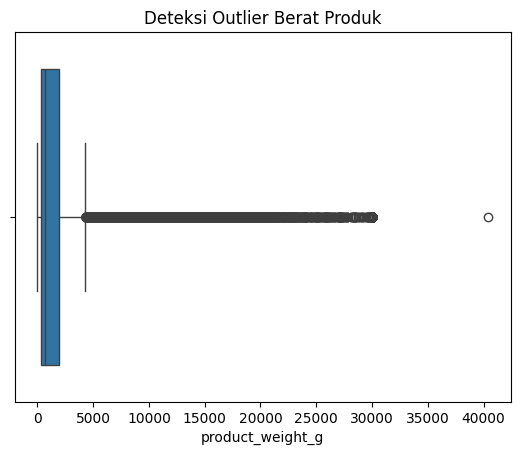

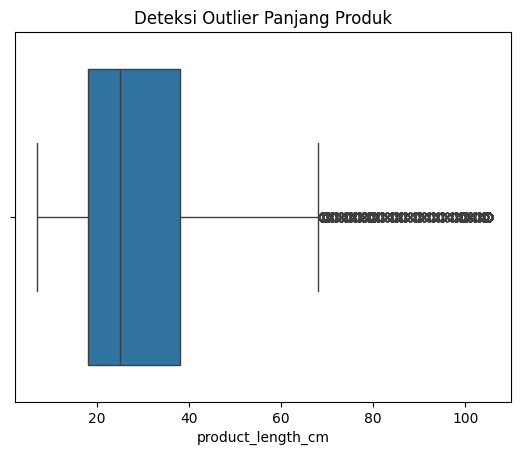

In [220]:
# Boxplot untuk mendeteksi outlier pada berat produk
sns.boxplot(x=df_merged['product_weight_g'])
plt.title('Deteksi Outlier Berat Produk')
plt.show()

# Boxplot untuk mendeteksi outlier pada panjang produk
sns.boxplot(x=df_merged['product_length_cm'])
plt.title('Deteksi Outlier Panjang Produk')
plt.show()


In [221]:
# Menampilkan nilai minimum dan maksimum untuk beberapa kolom
print(df_merged[['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']].min())
print(df_merged[['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']].max())


product_weight_g     0.0
product_length_cm    7.0
product_height_cm    2.0
product_width_cm     6.0
dtype: float64
product_weight_g     40425.0
product_length_cm      105.0
product_height_cm      105.0
product_width_cm       118.0
dtype: float64


In [222]:
# Memeriksa jumlah kategori produk yang unik
print(df_merged['product_category_name'].nunique())

# Memeriksa kategori produk yang paling sering muncul
print(df_merged['product_category_name'].value_counts().head())


71
product_category_name
bed_bath_table     3029
sports_leisure     2867
furniture_decor    2657
health_beauty      2444
housewares         2335
Name: count, dtype: int64


In [223]:
# Menghapus outlier berdasarkan batas atas dan bawah
df_merged = df_merged[df_merged['product_weight_g'] < df_merged['product_weight_g'].quantile(0.95)]  # Hapus data yang lebih dari quantile 95


In [224]:
# Persentase produk berdasarkan kategori
category_percent = df_merged['product_category_name'].value_counts(normalize=True) * 100
print(category_percent)


product_category_name
bed_bath_table                       9.457743
sports_leisure                       9.044130
furniture_decor                      8.089888
health_beauty                        7.783749
housewares                           7.109591
                                       ...   
furniture_mattress_and_upholstery    0.019541
fashion_childrens_clothes            0.016284
home_comfort_2                       0.016284
security_and_services                0.006514
cds_dvds_musicals                    0.003257
Name: proportion, Length: 71, dtype: float64


### EXPLORE `order_items_df`

In [226]:
order_items_df.sample(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
50878,73b3f1016ed8574c8260d57ac56522ee,1,cb92637d91f8267856d2143b6fc7bd9e,376a891762bbdecbc02b4b6adec3fdda,2018-03-20 02:50:58,55.00,13.65
44510,652436e8f3a1ba0f1eb9798fedb75426,1,c8a06a6cf1dbd09f3273d65d3dc2da99,1b7e5006cb25dd23ce8686691013b121,2018-01-09 10:06:34,69.99,14.24
94064,d543b0fedeb939f3fda2a3c2fe167b02,1,e84512060d6d75aeeadbe0ccc70e076b,4830e40640734fc1c52cd21127c341d4,2018-08-29 17:45:22,62.00,9.18
104109,ec7374fe6c0218473cecb08f8fbeca34,1,64fb265487de2238627ce43fe8a67efc,4a3ca9315b744ce9f8e9374361493884,2018-03-27 02:56:22,92.90,24.86
39436,59a9693b0e9ec73f8ea51b90d5601604,1,685919d3ededc26c0ec078b32241025a,855668e0971d4dfd7bef1b6a4133b41b,2018-05-09 12:55:21,52.00,11.15


In [225]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [227]:
order_items_df.describe()

,order_item_id,shipping_limit_date,price,freight_value
count,112650.000000,112650,112650.000000,112650.000000
mean,1.197834,2018-01-07 15:36:52.192685312,120.653739,19.990320
min,1.000000,2016-09-19 00:15:34,0.850000,0.000000
25%,1.000000,2017-09-20 20:57:27.500000,39.900000,13.080000
50%,1.000000,2018-01-26 13:59:35,74.990000,16.260000
75%,1.000000,2018-05-10 14:34:00.750000128,134.900000,21.150000
max,21.000000,2020-04-09 22:35:08,6735.000000,409.680000
std,0.705124,NaN,183.633928,15.806405


                  price  freight_value
price          1.000000       0.414204
freight_value  0.414204       1.000000


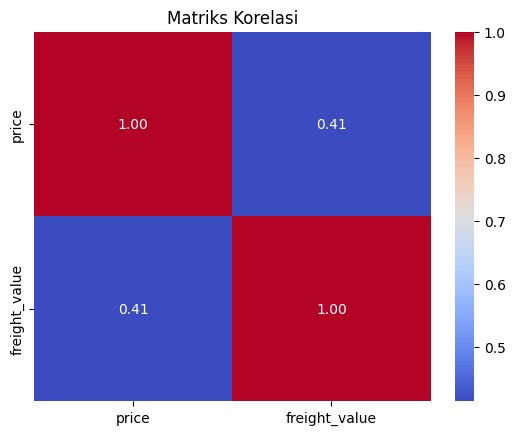

In [232]:
# Memeriksa korelasi antar kolom numerik
corr = order_items_df[['price', 'freight_value']].corr()
print(corr)

# Visualisasi korelasi dengan heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriks Korelasi')
plt.show()


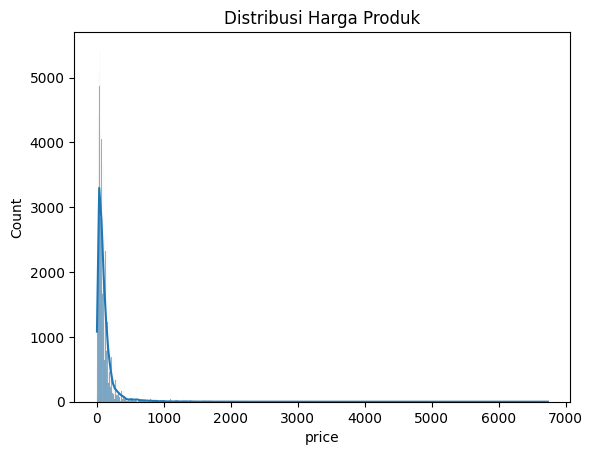

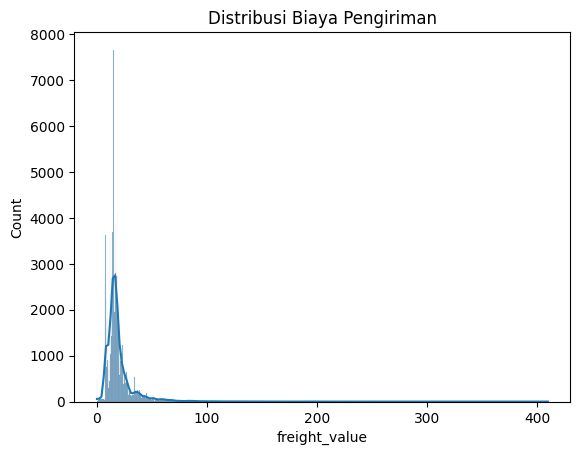

In [235]:
# Visualisasi distribusi harga produk
sns.histplot(order_items_df['price'], kde=True)
plt.title('Distribusi Harga Produk')
plt.show()

# Visualisasi distribusi biaya pengiriman
sns.histplot(order_items_df['freight_value'], kde=True)
plt.title('Distribusi Biaya Pengiriman')
plt.show()


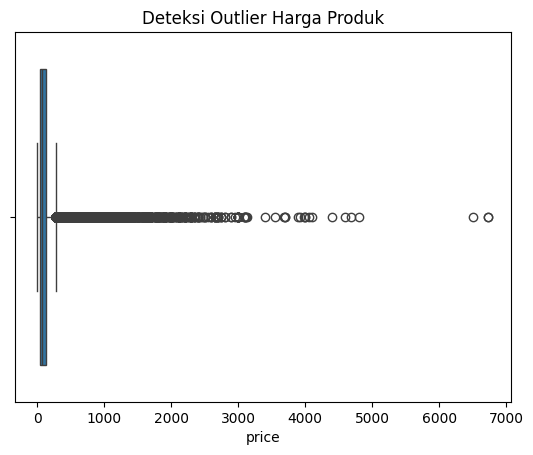

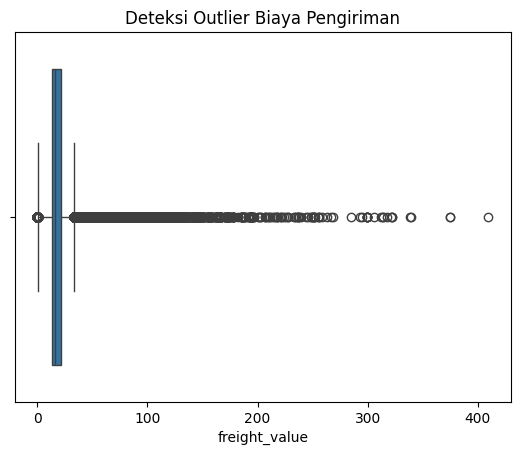

In [236]:
# Boxplot untuk mendeteksi outlier pada harga produk
sns.boxplot(x=order_items_df['price'])
plt.title('Deteksi Outlier Harga Produk')
plt.show()

# Boxplot untuk mendeteksi outlier pada biaya pengiriman
sns.boxplot(x=order_items_df['freight_value'])
plt.title('Deteksi Outlier Biaya Pengiriman')
plt.show()


In [238]:
# Persentase produk dengan harga di atas nilai tertentu
price_threshold = 100
high_price_percentage = (order_items_df[order_items_df['price'] > price_threshold].shape[0] / order_items_df.shape[0]) * 100
print(f"Persentase produk dengan harga lebih dari {price_threshold}: {high_price_percentage:.2f}%")


Persentase produk dengan harga lebih dari 100: 35.79%


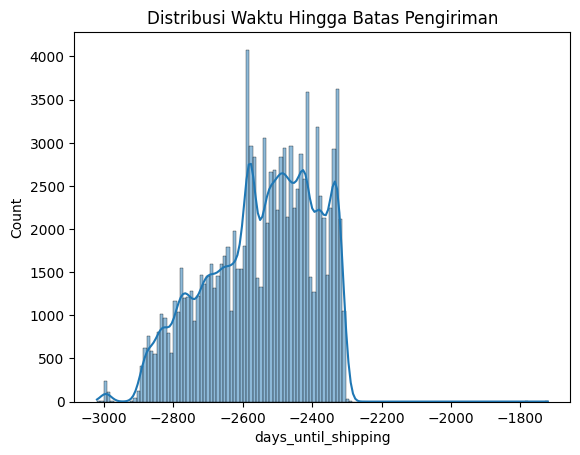

In [240]:
# Mengonversi shipping_limit_date ke tipe datetime
order_items_df['shipping_limit_date'] = pd.to_datetime(order_items_df['shipping_limit_date'])

# Memeriksa waktu pengiriman relatif terhadap tanggal sekarang
today = pd.to_datetime('today')
order_items_df['days_until_shipping'] = (order_items_df['shipping_limit_date'] - today).dt.days

# Visualisasi distribusi waktu pengiriman
sns.histplot(order_items_df['days_until_shipping'], kde=True)
plt.title('Distribusi Waktu Hingga Batas Pengiriman')
plt.show()


In [243]:
# Menghapus outlier berdasarkan batas atas dan bawah
order_items_df = order_items_df[order_items_df['price'] < order_items_df['price'].quantile(0.95)]  # Hapus data yang lebih dari quantile 95


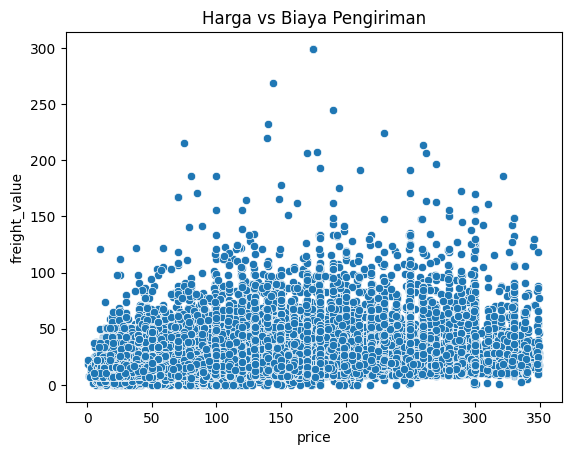

In [250]:
# Scatter plot antara harga dan biaya pengiriman
sns.scatterplot(x='price', y='freight_value', data=order_items_df)
plt.title('Harga vs Biaya Pengiriman')
plt.show()


### EXPLORE `order_items_df` dan `products_df`

In [281]:
# Menggabungkan order_items_df dan products_df berdasarkan 'product_id'
order_products_df = pd.merge(order_items_df, df_merged, on='product_id', how='inner')

# Memeriksa hasil gabungan
order_products_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_id_grouped,days_until_shipping,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,48436dade18ac8b2bce089ec2a041202,-2655,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,5b51032eddd242adc84c38acab88f23d,-2534,furniture_decor,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
2,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,9d7a1d34a5052409006425275ba1c2b4,-2325,perfumery,42.0,480.0,1.0,200.0,16.0,10.0,15.0
3,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,df560393f3a51e74553ab94004ba5c87,-2873,garden_tools,59.0,409.0,1.0,3750.0,35.0,40.0,30.0
4,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,21.90,12.69,6426d21aca402a131fc0a5d0960a3c90,-2774,housewares,36.0,558.0,1.0,450.0,24.0,8.0,15.0


In [282]:
order_products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103915 entries, 0 to 103914
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   order_id                    103915 non-null  object        
 1   order_item_id               103915 non-null  int64         
 2   product_id                  103915 non-null  object        
 3   seller_id                   103915 non-null  object        
 4   shipping_limit_date         103915 non-null  datetime64[ns]
 5   price                       103915 non-null  float64       
 6   freight_value               103915 non-null  float64       
 7   seller_id_grouped           103915 non-null  object        
 8   days_until_shipping         103915 non-null  int64         
 9   product_category_name       102373 non-null  object        
 10  product_name_lenght         103915 non-null  float64       
 11  product_description_lenght  103915 non-

In [283]:
# Menghapus baris yang memiliki missing value di kolom 'product_category_name'
merged_df = order_products_df.dropna(subset=['product_category_name'])

# Memeriksa data setelah penghapusan
print(merged_df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 102373 entries, 0 to 103914
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   order_id                    102373 non-null  object        
 1   order_item_id               102373 non-null  int64         
 2   product_id                  102373 non-null  object        
 3   seller_id                   102373 non-null  object        
 4   shipping_limit_date         102373 non-null  datetime64[ns]
 5   price                       102373 non-null  float64       
 6   freight_value               102373 non-null  float64       
 7   seller_id_grouped           102373 non-null  object        
 8   days_until_shipping         102373 non-null  int64         
 9   product_category_name       102373 non-null  object        
 10  product_name_lenght         102373 non-null  float64       
 11  product_description_lenght  102373 non-null 

In [284]:
order_products_df.describe()

,order_item_id,shipping_limit_date,price,freight_value,days_until_shipping,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,103915.000000,103915,103915.000000,103915.000000,103915.000000,103915.000000,103915.000000,103915.000000,103915.000000,103915.000000,103915.000000,103915.000000
mean,1.202762,2018-01-08 03:11:39.667824640,87.217285,17.925674,-2544.068748,48.856527,763.156166,2.169850,1453.957908,29.202502,15.210759,22.188038
min,1.000000,2016-09-19 00:15:34,0.850000,0.000000,-3020.000000,5.000000,4.000000,0.000000,0.000000,7.000000,2.000000,6.000000
25%,1.000000,2017-09-21 07:10:16,38.485000,12.790000,-2653.000000,43.000000,341.000000,1.000000,250.000000,18.000000,8.000000,15.000000
50%,1.000000,2018-01-26 14:03:09,69.000000,15.900000,-2526.000000,52.000000,594.000000,1.000000,600.000000,24.000000,12.000000,20.000000
75%,1.000000,2018-05-10 15:55:22.500000,119.900000,19.570000,-2422.000000,57.000000,941.000000,3.000000,1550.000000,36.000000,20.000000,29.000000
max,21.000000,2020-02-05 03:30:51,349.800000,220.040000,-1786.000000,76.000000,3988.000000,20.000000,10825.000000,105.000000,105.000000,118.000000
std,0.715218,NaN,66.029721,10.155970,152.538985,9.981063,632.720744,1.727907,2082.602441,15.299863,11.451178,10.872414


                      price  freight_value  product_weight_g  \
price              1.000000       0.296672          0.325982   
freight_value      0.296672       1.000000          0.413284   
product_weight_g   0.325982       0.413284          1.000000   
product_length_cm  0.168802       0.216950          0.433874   
product_height_cm  0.196225       0.247490          0.480770   
product_width_cm   0.171348       0.220469          0.484171   

                   product_length_cm  product_height_cm  product_width_cm  
price                       0.168802           0.196225          0.171348  
freight_value               0.216950           0.247490          0.220469  
product_weight_g            0.433874           0.480770          0.484171  
product_length_cm           1.000000           0.111226          0.523077  
product_height_cm           0.111226           1.000000          0.214116  
product_width_cm            0.523077           0.214116          1.000000  


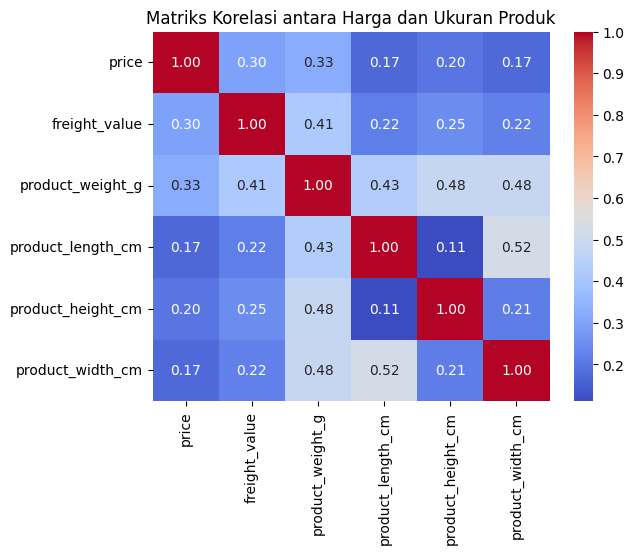

In [285]:
# Memeriksa korelasi antar kolom numerik yang relevan
corr = order_products_df[['price', 'freight_value', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']].corr()
print(corr)

# Visualisasi korelasi dengan heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriks Korelasi antara Harga dan Ukuran Produk')
plt.show()


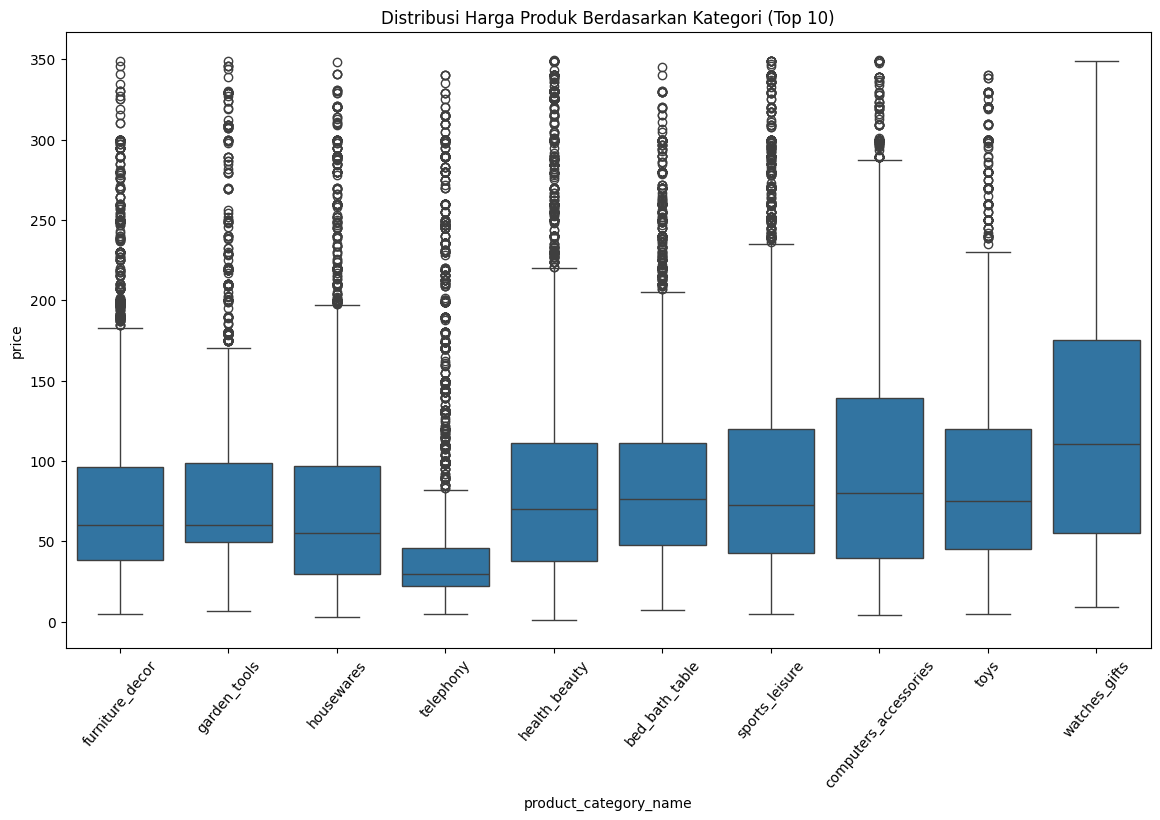

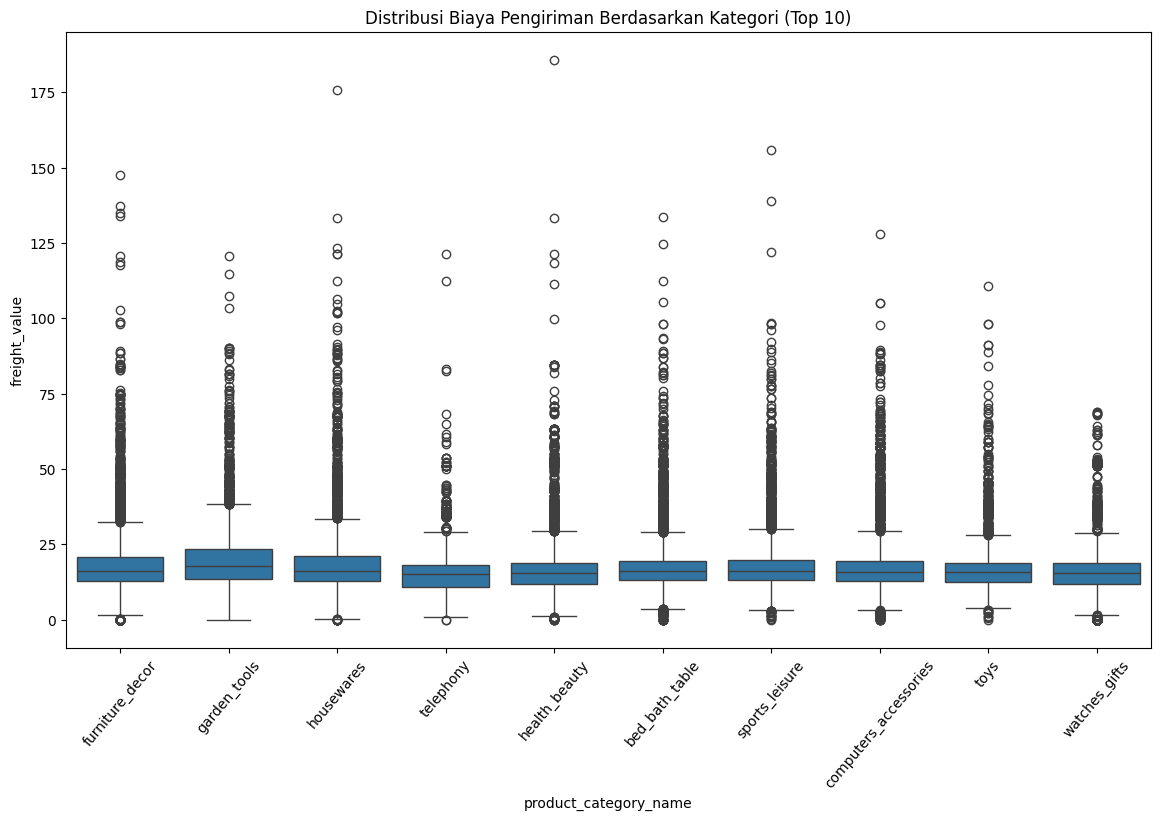

In [286]:
# Menghitung jumlah produk per kategori
top_categories = order_products_df['product_category_name'].value_counts().head(10).index

# Memilih data untuk 10 kategori teratas
filtered_df = order_products_df[order_products_df['product_category_name'].isin(top_categories)]

# Visualisasi distribusi harga berdasarkan kategori produk (Top 10)
plt.figure(figsize=(14, 8))
sns.boxplot(x='product_category_name', y='price', data=filtered_df)
plt.title('Distribusi Harga Produk Berdasarkan Kategori (Top 10)')
plt.xticks(rotation=50)
plt.show()

# Visualisasi distribusi biaya pengiriman berdasarkan kategori produk (Top 10)
plt.figure(figsize=(14, 8))
sns.boxplot(x='product_category_name', y='freight_value', data=filtered_df)
plt.title('Distribusi Biaya Pengiriman Berdasarkan Kategori (Top 10)')
plt.xticks(rotation=50)
plt.show()


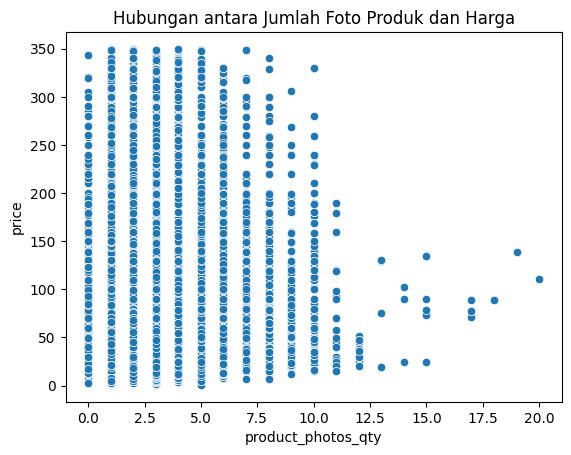

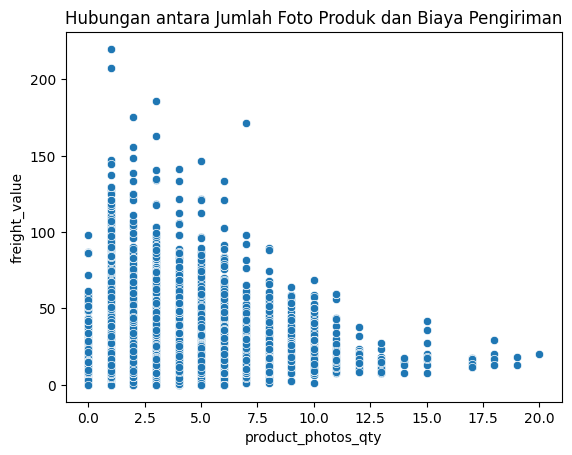

In [287]:
# Scatter plot antara jumlah foto produk dan harga
sns.scatterplot(x='product_photos_qty', y='price', data=order_products_df)
plt.title('Hubungan antara Jumlah Foto Produk dan Harga')
plt.show()

# Scatter plot antara jumlah foto produk dan biaya pengiriman
sns.scatterplot(x='product_photos_qty', y='freight_value', data=order_products_df)
plt.title('Hubungan antara Jumlah Foto Produk dan Biaya Pengiriman')
plt.show()


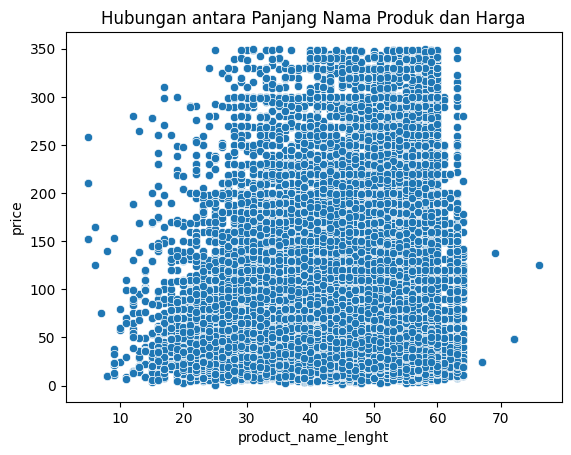

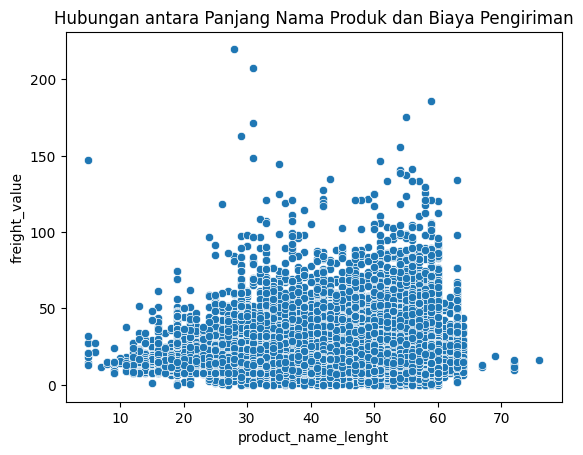

In [288]:
# Scatter plot antara panjang nama produk dan harga
sns.scatterplot(x='product_name_lenght', y='price', data=order_products_df)
plt.title('Hubungan antara Panjang Nama Produk dan Harga')
plt.show()

# Scatter plot antara panjang nama produk dan biaya pengiriman
sns.scatterplot(x='product_name_lenght', y='freight_value', data=order_products_df)
plt.title('Hubungan antara Panjang Nama Produk dan Biaya Pengiriman')
plt.show()


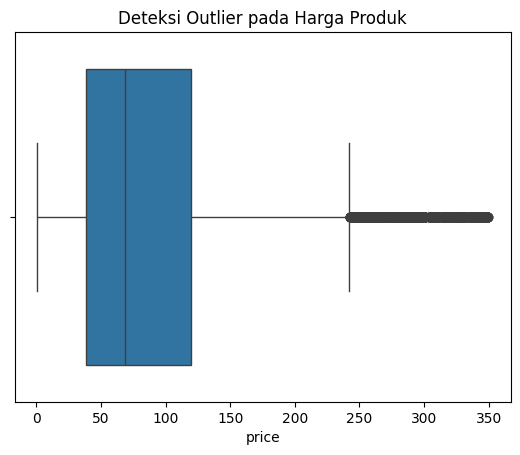

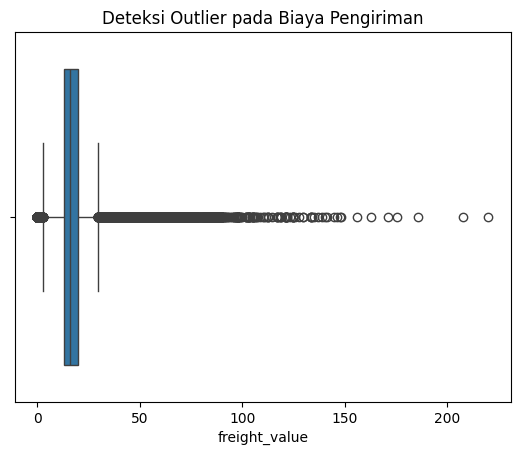

In [289]:
# Boxplot untuk mendeteksi outlier pada harga produk
sns.boxplot(x=order_products_df['price'])
plt.title('Deteksi Outlier pada Harga Produk')
plt.show()

# Boxplot untuk mendeteksi outlier pada biaya pengiriman
sns.boxplot(x=order_products_df['freight_value'])
plt.title('Deteksi Outlier pada Biaya Pengiriman')
plt.show()


In [290]:
# Rata-rata harga per seller
average_price_per_seller = order_products_df.groupby('seller_id')['price'].mean()
print(average_price_per_seller.head())

# Rata-rata biaya pengiriman per seller
average_freight_per_seller = order_products_df.groupby('seller_id')['freight_value'].mean()
print(average_freight_per_seller.head())


seller_id
001cca7ae9ae17fb1caed9dfb1094831    104.775225
001e6ad469a905060d959994f1b41e4f    250.000000
002100f778ceb8431b7a1020ff7ab48f     22.445455
003554e2dce176b5555353e4f3555ac8    120.000000
004c9cd9d87a3c30c522c48c4fc07416    113.586205
Name: price, dtype: float64
seller_id
001cca7ae9ae17fb1caed9dfb1094831    36.296982
001e6ad469a905060d959994f1b41e4f    17.940000
002100f778ceb8431b7a1020ff7ab48f    14.430182
003554e2dce176b5555353e4f3555ac8    19.380000
004c9cd9d87a3c30c522c48c4fc07416    19.325482
Name: freight_value, dtype: float64


In [291]:
# Menghapus outlier berdasarkan batas kuartil
Q1 = order_products_df['price'].quantile(0.25)
Q3 = order_products_df['price'].quantile(0.75)
IQR = Q3 - Q1
merged_df = order_products_df[(order_products_df['price'] >= (Q1 - 1.5 * IQR)) & (order_products_df['price'] <= (Q3 + 1.5 * IQR))]


### EXPLORE ALL DATA

In [321]:
# Menggabungkan DataFrame berdasarkan kunci yang relevan
all_data_df = customers_df.merge(order_df, on='customer_id', how='inner') \
                           .merge(order_items_df, on='order_id', how='inner') \
                           .merge(df_merged, on='product_id', how='inner')

# Memeriksa hasil gabungan
all_data_df.info()
all_data_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103915 entries, 0 to 103914
Data columns (total 31 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    103915 non-null  object        
 1   customer_zip_code_prefix       103915 non-null  int64         
 2   customer_city                  103915 non-null  object        
 3   customer_state                 103915 non-null  object        
 4   order_id                       103915 non-null  object        
 5   order_status                   103915 non-null  category      
 6   order_purchase_timestamp       103915 non-null  datetime64[ns]
 7   order_approved_at              103915 non-null  datetime64[ns]
 8   order_delivered_carrier_date   102898 non-null  datetime64[ns]
 9   order_delivered_customer_date  101753 non-null  datetime64[ns]
 10  order_estimated_delivery_date  103915 non-null  datetime64[ns]
 11  

,customer_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,...,seller_id_grouped,days_until_shipping,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,06b8999e2fba1a1fbc88172c00ba8bc7,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,...,7c67e1448b00f6e969d365cea6b010ab,-2775,office_furniture,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
1,18955e83d337fd6b2def6b18a428ac77,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,...,b8bc237ba3788b23da09c0f1f3a3288c,-2533,housewares,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0
2,4e7b3e00288586ebd08712fdd0374a03,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,...,7c67e1448b00f6e969d365cea6b010ab,-2396,office_furniture,55.0,955.0,1.0,8267.0,52.0,52.0,17.0
3,4f2d8ab171c80ec8364f7c12e35b23ad,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,...,4a3ca9315b744ce9f8e9374361493884,-2340,home_confort,61.0,407.0,1.0,5200.0,45.0,15.0,35.0
4,879864dab9bc3047522c92c82e1212b8,89254,jaragua do sul,SC,5741ea1f91b5fbab2bd2dc653a5b5099,delivered,2017-09-14 18:14:31,2017-09-14 18:25:11,2017-09-18 21:27:40,2017-09-28 17:32:43,...,8f2ce03f928b567e3d56181ae20ae952,-2653,sports_leisure,32.0,282.0,2.0,4450.0,60.0,15.0,15.0


In [322]:
# Memeriksa missing values di seluruh kolom
print(all_data_df.isnull().sum())


customer_id                         0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_id                            0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date     1017
order_delivered_customer_date    2162
order_estimated_delivery_date       0
purchase_day                        0
purchase_month                      0
purchase_year                       0
delivery_time                    2162
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
seller_id_grouped                   0
days_until_shipping                 0
product_category_name            1542
product_name_lenght                 0
product_description_lenght          0
product_phot

In [323]:
# Memeriksa statistik deskriptif untuk kolom numerik
all_data_df.describe()


,customer_zip_code_prefix,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchase_day,purchase_month,purchase_year,delivery_time,...,price,freight_value,days_until_shipping,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,103915.000000,103915,103915,102898,101753,103915,103915.000000,103915.000000,103915.000000,101753.000000,...,103915.000000,103915.000000,103915.000000,103915.000000,103915.000000,103915.000000,103915.000000,103915.000000,103915.000000,103915.000000
mean,34970.428908,2018-01-01 14:38:53.111841280,2018-01-02 01:05:35.008391680,2018-01-05 12:00:44.746098176,2018-01-14 21:25:27.982958848,2018-01-25 06:13:53.319539968,2.746937,6.037021,2017.542665,11.813185,...,87.217285,17.925674,-2544.068748,48.856527,763.156166,2.169850,1453.957908,29.202502,15.210759,22.188038
min,1003.000000,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00,0.000000,1.000000,2016.000000,0.000000,...,0.850000,0.000000,-3020.000000,5.000000,4.000000,0.000000,0.000000,7.000000,2.000000,6.000000
25%,11065.000000,2017-09-14 14:36:00,2017-09-14 22:24:15.500000,2017-09-19 14:28:47.750000128,2017-09-27 17:47:56,2017-10-05 00:00:00,1.000000,3.000000,2017.000000,6.000000,...,38.485000,12.790000,-2653.000000,43.000000,341.000000,1.000000,250.000000,18.000000,8.000000,15.000000
50%,24230.000000,2018-01-20 13:16:10,2018-01-20 19:09:32,2018-01-24 18:17:59.500000,2018-02-02 20:09:02,2018-02-15 00:00:00,3.000000,6.000000,2018.000000,10.000000,...,69.000000,15.900000,-2526.000000,52.000000,594.000000,1.000000,600.000000,24.000000,12.000000,20.000000
75%,58423.000000,2018-05-05 01:58:12,2018-05-05 13:42:00.500000,2018-05-08 14:04:45,2018-05-15 21:16:24,2018-05-28 00:00:00,4.000000,8.000000,2018.000000,15.000000,...,119.900000,19.570000,-2422.000000,57.000000,941.000000,3.000000,1550.000000,36.000000,20.000000,29.000000
max,99990.000000,2018-09-03 09:06:57,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-23 00:00:00,6.000000,12.000000,2018.000000,209.000000,...,349.800000,220.040000,-1786.000000,76.000000,3988.000000,20.000000,10825.000000,105.000000,105.000000,118.000000
std,29897.502400,NaN,NaN,NaN,NaN,NaN,1.964914,3.236522,0.504742,9.246567,...,66.029721,10.155970,152.538985,9.981063,632.720744,1.727907,2082.602441,15.299863,11.451178,10.872414


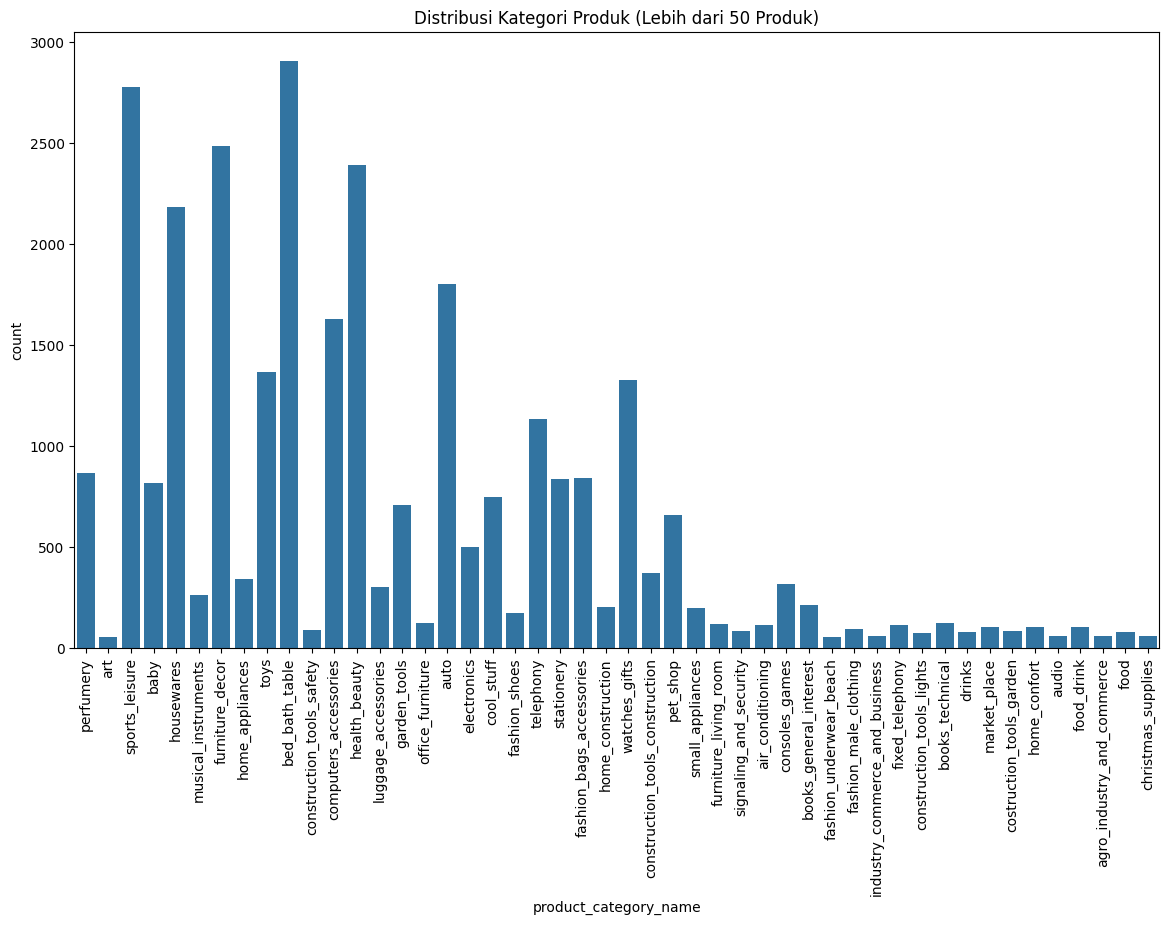

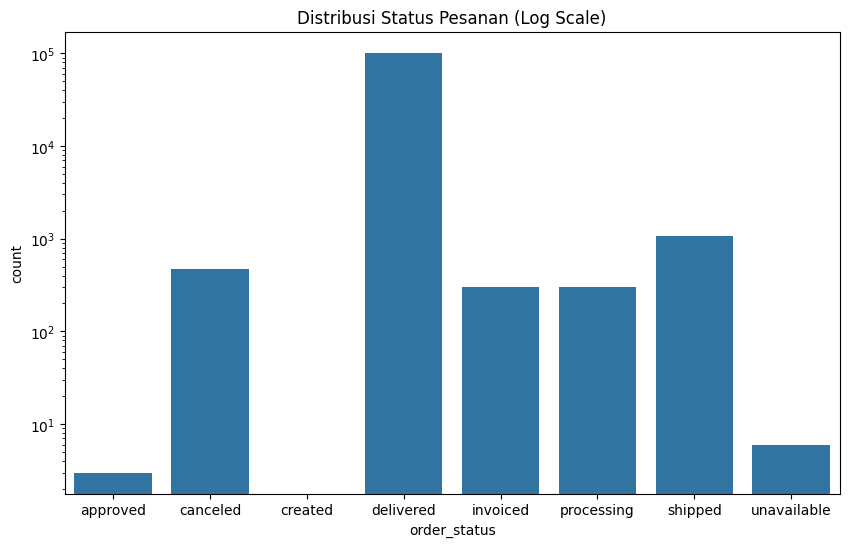

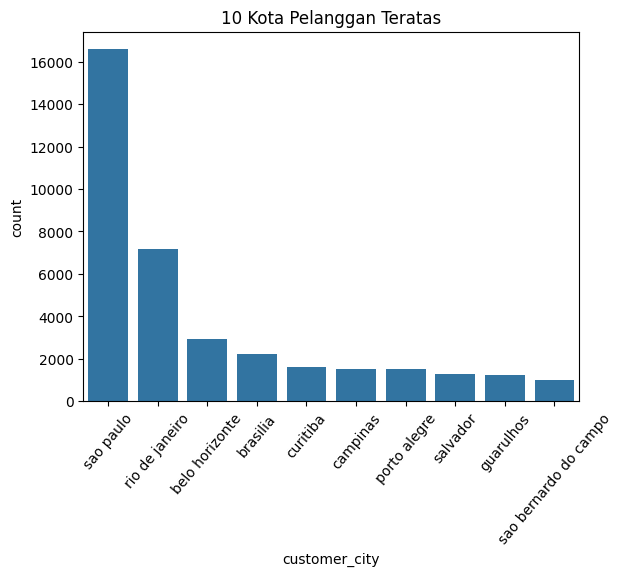

In [324]:
# Distribusi Kategori Produk
category_counts = df_merged['product_category_name'].value_counts()
filtered_categories = category_counts[category_counts > 50].index
filtered_df = df_merged[df_merged['product_category_name'].isin(filtered_categories)]
plt.figure(figsize=(14, 8))
sns.countplot(x='product_category_name', data=filtered_df)
plt.title('Distribusi Kategori Produk (Lebih dari 50 Produk)')
plt.xticks(rotation=90)
plt.show()

# Visualisasi distribusi status pesanan dengan log scale pada sumbu y
plt.figure(figsize=(10, 6))
sns.countplot(x='order_status', data=all_data_df)
plt.yscale('log')  # Menggunakan log scale pada sumbu y
plt.title('Distribusi Status Pesanan (Log Scale)')
plt.show()


# Distribusi kota pelanggan
sns.countplot(x='customer_city', data=all_data_df, order=all_data_df['customer_city'].value_counts().index[:10])
plt.title('10 Kota Pelanggan Teratas')
plt.xticks(rotation=50)
plt.show()


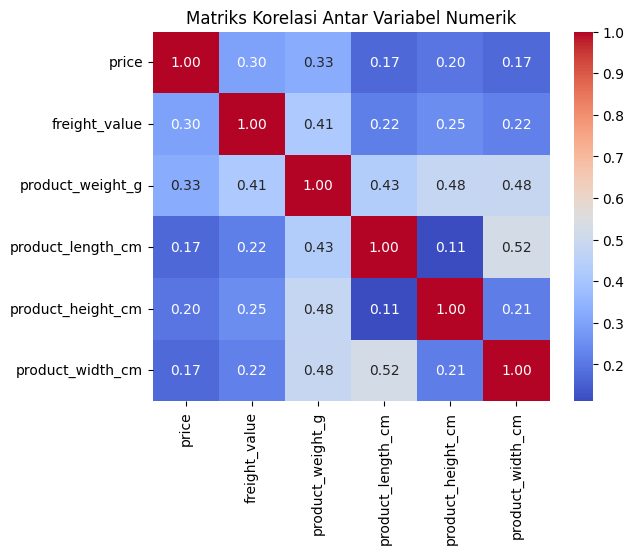

In [325]:
# Menghitung korelasi antar kolom numerik
corr_matrix = all_data_df[['price', 'freight_value', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']].corr()

# Visualisasi korelasi dengan heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriks Korelasi Antar Variabel Numerik')
plt.show()


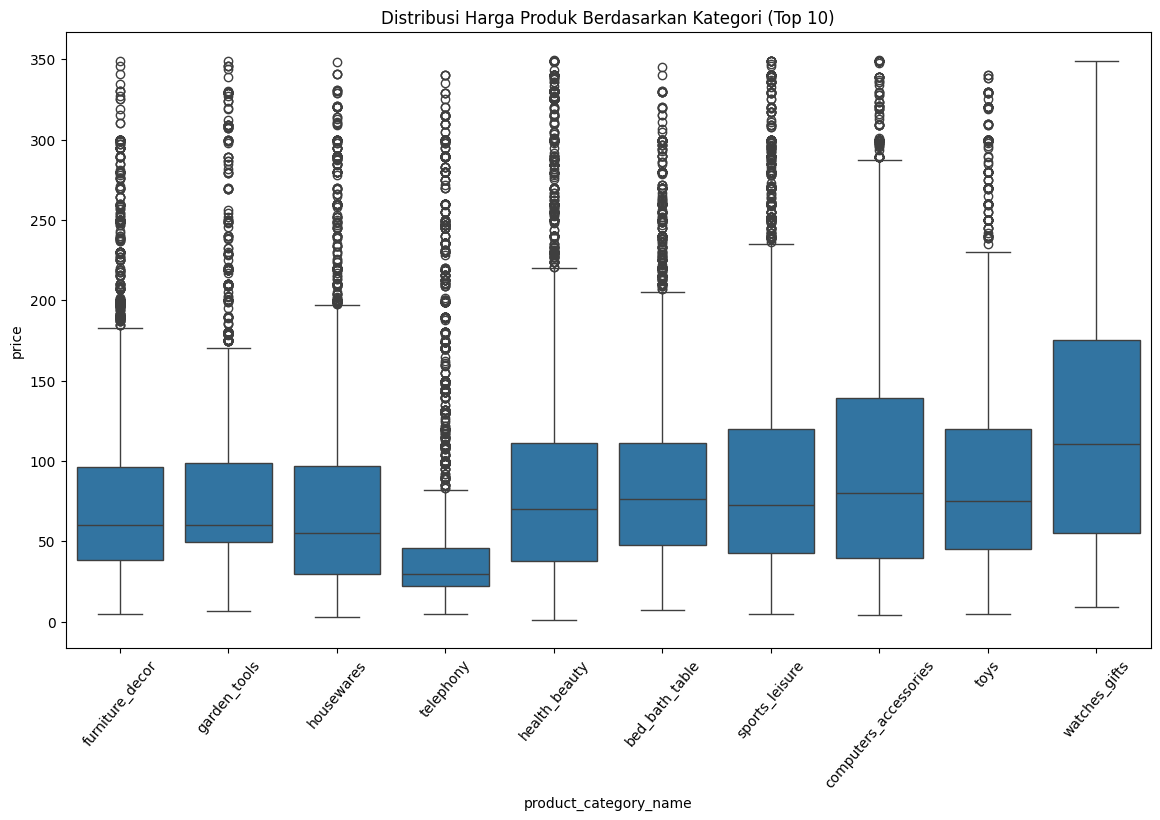

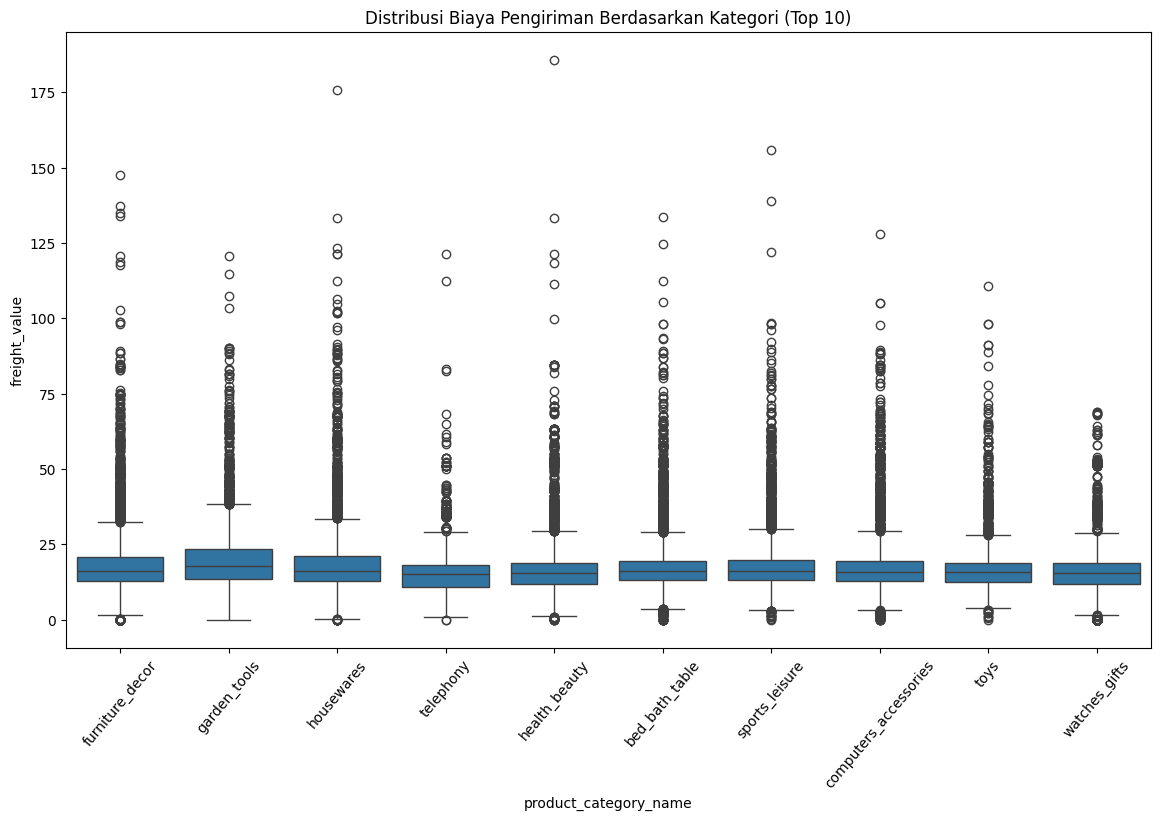

In [326]:
# Menghitung jumlah produk per kategori
top_categories = order_products_df['product_category_name'].value_counts().head(10).index

# Memilih data untuk 10 kategori teratas
filtered_df = order_products_df[order_products_df['product_category_name'].isin(top_categories)]

# Visualisasi distribusi harga berdasarkan kategori produk (Top 10)
plt.figure(figsize=(14, 8))
sns.boxplot(x='product_category_name', y='price', data=filtered_df)
plt.title('Distribusi Harga Produk Berdasarkan Kategori (Top 10)')
plt.xticks(rotation=50)
plt.show()

# Visualisasi distribusi biaya pengiriman berdasarkan kategori produk (Top 10)
plt.figure(figsize=(14, 8))
sns.boxplot(x='product_category_name', y='freight_value', data=filtered_df)
plt.title('Distribusi Biaya Pengiriman Berdasarkan Kategori (Top 10)')
plt.xticks(rotation=50)
plt.show()


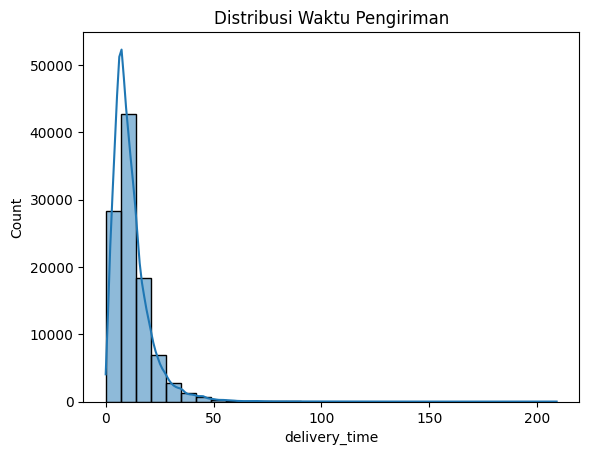

In [327]:
# Mengonversi kolom tanggal menjadi datetime
all_data_df['order_purchase_timestamp'] = pd.to_datetime(all_data_df['order_purchase_timestamp'])
all_data_df['order_approved_at'] = pd.to_datetime(all_data_df['order_approved_at'])
all_data_df['order_delivered_carrier_date'] = pd.to_datetime(all_data_df['order_delivered_carrier_date'])
all_data_df['order_delivered_customer_date'] = pd.to_datetime(all_data_df['order_delivered_customer_date'])

# Menambahkan kolom baru untuk selisih waktu (misalnya waktu pengiriman)
all_data_df['delivery_time'] = (all_data_df['order_delivered_customer_date'] - all_data_df['order_purchase_timestamp']).dt.days

# Visualisasi distribusi waktu pengiriman
sns.histplot(all_data_df['delivery_time'], kde=True, bins=30)
plt.title('Distribusi Waktu Pengiriman')
plt.show()


In [328]:
# Segmentasi pelanggan berdasarkan kota
segment_city = all_data_df.groupby('customer_city')['order_id'].nunique().sort_values(ascending=False)
print(segment_city.head())

# Segmentasi pelanggan berdasarkan kategori produk
segment_category = all_data_df.groupby('product_category_name')['order_id'].nunique().sort_values(ascending=False)
print(segment_category.head())


customer_city
sao paulo         14320
rio de janeiro     6235
belo horizonte     2546
brasilia           1957
curitiba           1401
Name: order_id, dtype: int64
product_category_name
bed_bath_table           9179
health_beauty            8068
sports_leisure           7367
computers_accessories    6459
furniture_decor          6015
Name: order_id, dtype: int64


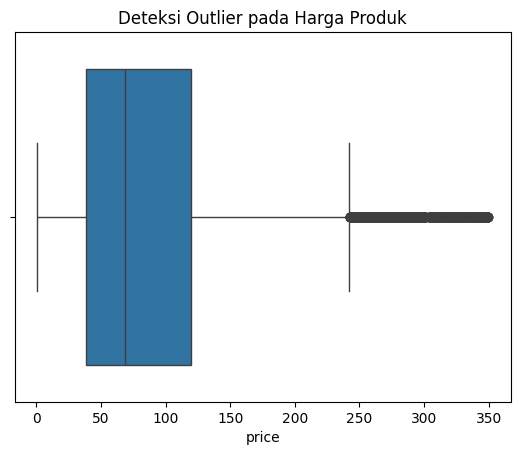

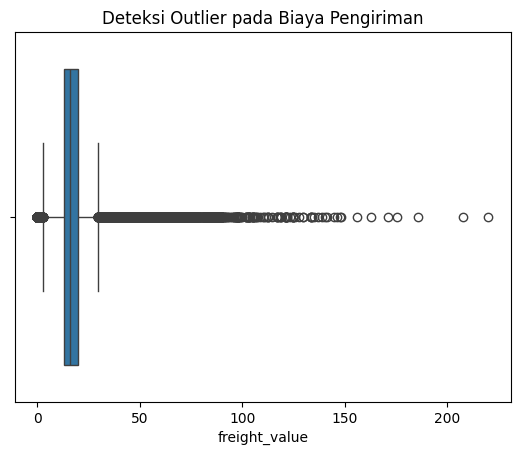

In [329]:
# Menggunakan boxplot untuk mendeteksi outlier pada harga
sns.boxplot(x=all_data_df['price'])
plt.title('Deteksi Outlier pada Harga Produk')
plt.show()

# Menggunakan boxplot untuk mendeteksi outlier pada biaya pengiriman
sns.boxplot(x=all_data_df['freight_value'])
plt.title('Deteksi Outlier pada Biaya Pengiriman')
plt.show()


In [330]:
# Rata-rata harga per penjual
avg_price_per_seller = all_data_df.groupby('seller_id')['price'].mean()

# Rata-rata biaya pengiriman per penjual
avg_freight_per_seller = all_data_df.groupby('seller_id')['freight_value'].mean()

# Menampilkan beberapa penjual teratas berdasarkan harga rata-rata
avg_price_per_seller.head()


,price
seller_id,
001cca7ae9ae17fb1caed9dfb1094831,104.775225
001e6ad469a905060d959994f1b41e4f,250.000000
002100f778ceb8431b7a1020ff7ab48f,22.445455
003554e2dce176b5555353e4f3555ac8,120.000000
004c9cd9d87a3c30c522c48c4fc07416,113.586205


In [331]:
all_data_df.groupby(by="customer_state").agg({
    "order_id": "nunique",
    "price": "sum"
}).sort_values(by="price", ascending=False)

,order_id,price
customer_state,,
SP,38377,3630531.82
RJ,11696,1216147.55
MG,10626,1063114.88
RS,5035,523801.21
PR,4637,461355.20
SC,3310,338126.83
BA,3059,321977.58
DF,1966,200236.85
GO,1824,190192.42


In [332]:
all_data_df.to_csv("all_data.csv", index=False)

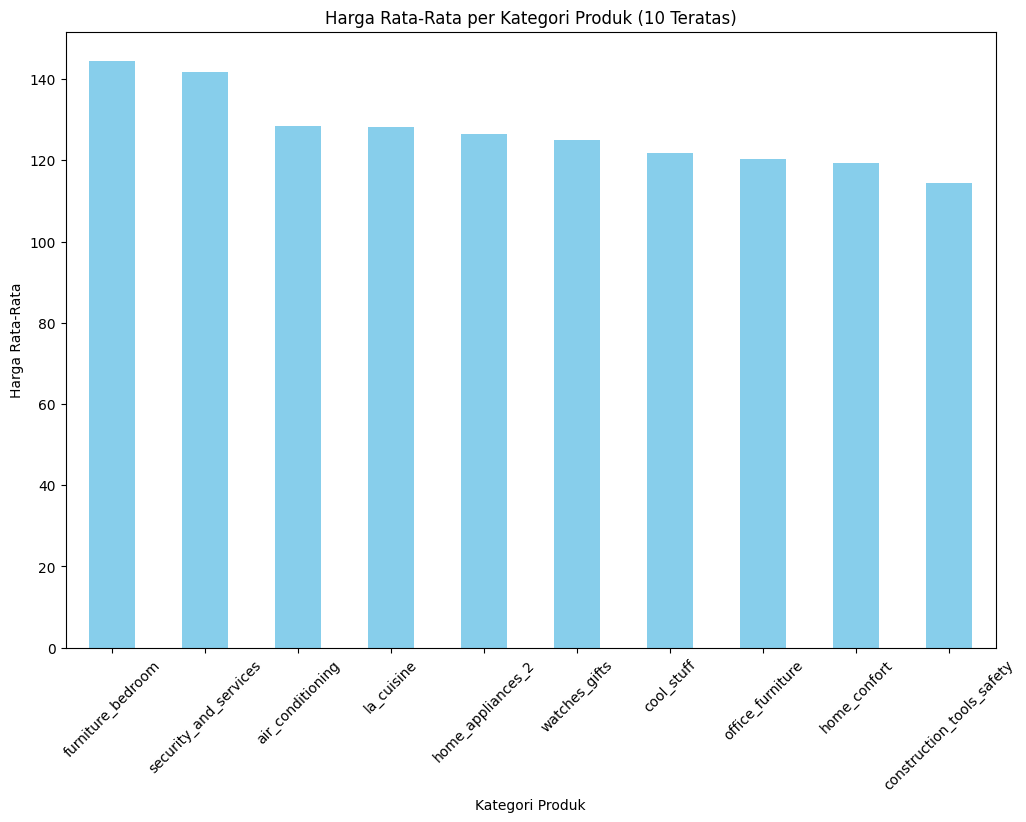

10 Kategori Produk dengan Harga Rata-Rata Tertinggi:
product_category_name
furniture_bedroom            144.413529
security_and_services        141.645000
air_conditioning             128.509962
la_cuisine                   128.153077
home_appliances_2            126.436122
watches_gifts                125.010885
cool_stuff                   121.895130
office_furniture             120.417519
home_confort                 119.240417
construction_tools_safety    114.357885
Name: price, dtype: float64


In [333]:
# Menghitung harga rata-rata per kategori produk
avg_price_by_category = all_data_df.groupby('product_category_name')['price'].mean().sort_values(ascending=False)

# Mengambil 10 kategori produk dengan harga rata-rata tertinggi
top_10_categories = avg_price_by_category.head(10)

# Visualisasi harga rata-rata per kategori produk (hanya 10 kategori teratas)
plt.figure(figsize=(12, 8))
top_10_categories.plot(kind='bar', color='skyblue')
plt.title('Harga Rata-Rata per Kategori Produk (10 Teratas)')
plt.xlabel('Kategori Produk')
plt.ylabel('Harga Rata-Rata')
plt.xticks(rotation=45)
plt.show()

# Menampilkan 10 kategori produk dengan harga tertinggi
print("10 Kategori Produk dengan Harga Rata-Rata Tertinggi:")
print(top_10_categories)



### **Insight:**
- Salah satu langkah dalam EDA adalah memeriksa korelasi antar fitur untuk mengetahui hubungan antar variabel yang ada.
- Dengan konsentrasi pelanggan yang tinggi di Sao Paulo, ini membuka peluang untuk melakukan kampanye pemasaran yang lebih terfokus di kota ini. Misalnya, menawarkan diskon khusus, promosi, atau acara yang lebih relevan dengan preferensi konsumen di Sao Paulo.

## Visualization & Explanatory Analysis

### Pertanyaan 1:
**Apa kategori produk yang memiliki harga rata-rata tertinggi dan terendah?**

In [316]:
all_data_df.sample(5)

,customer_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,...,seller_id_grouped,days_until_shipping,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
39745,ac9b50b4cbc686b649cc58e76fc794f6,83504,almirante tamandare,PR,ce7f20b493bdd502a0443f39ad764684,delivered,2018-01-25 11:06:19,2018-01-25 11:17:28,2018-01-30 16:39:56,2018-02-14 22:46:55,...,1f50f920176fa81dab994f9023523100,-2521,ferramentas_jardim,58.0,340.0,2.0,1500.0,30.0,22.0,30.0
40414,ce9c84a5a9d089aee9b8fa2a5fe5bf77,14800,araraquara,SP,6727a4e9eed7135cefc6d0f9de7f88a3,delivered,2018-07-23 08:06:43,2018-07-23 14:31:35,2018-07-24 08:11:00,2018-07-27 18:58:20,...,d4e12e7884759a14fa0f5f896c791cae,-2346,cama_mesa_banho,45.0,2126.0,1.0,1700.0,30.0,23.0,11.0
86529,b49786f49847d2fecf5ba2d455321642,30130,belo horizonte,MG,0362e923f805ae4dce58fd78c86c96c4,delivered,2018-04-13 13:54:38,2018-04-13 14:09:47,2018-04-13 23:32:38,2018-04-20 22:18:41,...,b92e3c8f9738272ff7c59e111e108d7c,-2443,moveis_cozinha_area_de_servico_jantar_e_jardim,17.0,540.0,1.0,17500.0,97.0,24.0,45.0
25301,7af20ab489d2f181dd71530f340d59af,80730,curitiba,PR,394600fad8c925734a04d88f935395e4,delivered,2018-01-24 09:41:07,2018-01-24 09:53:46,2018-01-24 21:58:52,2018-02-14 18:07:37,...,620c87c171fb2a6dd6e8bb4dec959fc6,-2522,perfumaria,36.0,605.0,2.0,100.0,20.0,20.0,20.0
87479,4bcc80146ca13e3d9b20a64dfe874d1e,14810,araraquara,SP,ec5370bb4b60ece613591700eaf1f5d0,delivered,2018-01-17 00:20:07,2018-01-17 00:32:37,2018-01-18 19:13:35,2018-01-25 12:19:01,...,3a1a1fec38dd360f15fc912e821e169d,-2529,automotivo,42.0,107.0,2.0,1350.0,50.0,20.0,30.0


#### Menampilkan 10 kategori produk dengan harga rata-rata tertinggi

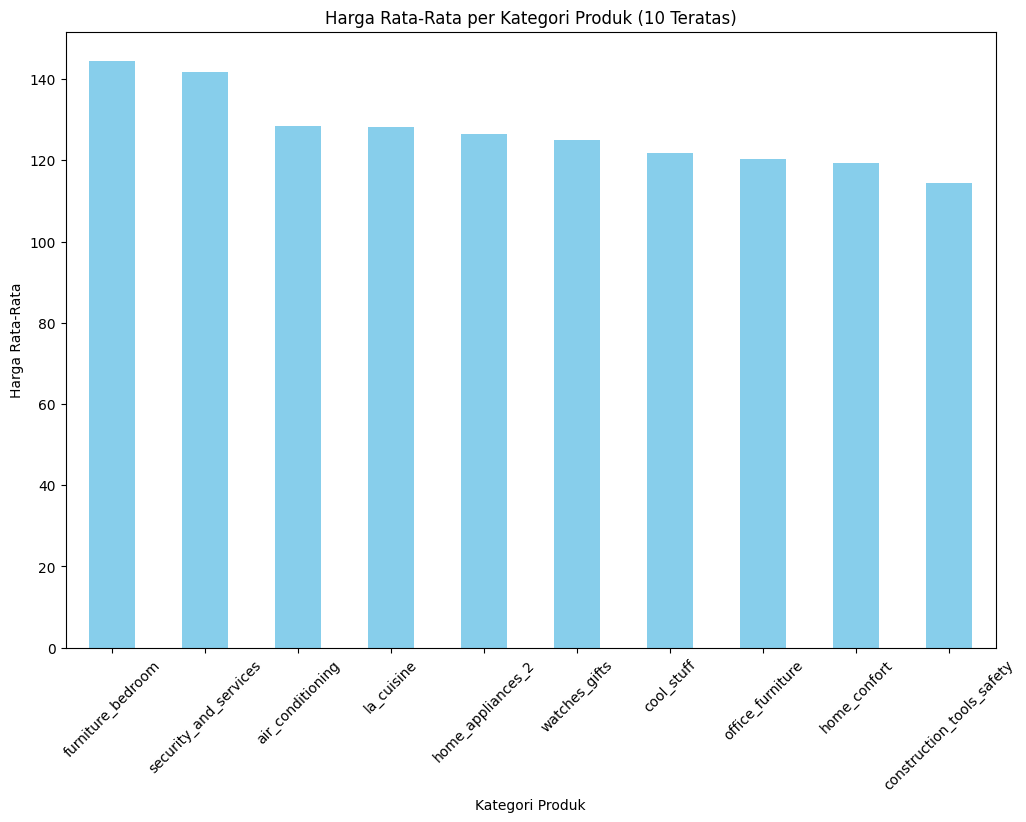

10 Kategori Produk dengan Harga Rata-Rata Tertinggi:
product_category_name
furniture_bedroom            144.413529
security_and_services        141.645000
air_conditioning             128.509962
la_cuisine                   128.153077
home_appliances_2            126.436122
watches_gifts                125.010885
cool_stuff                   121.895130
office_furniture             120.417519
home_confort                 119.240417
construction_tools_safety    114.357885
Name: price, dtype: float64


In [334]:
# Menghitung harga rata-rata per kategori produk
avg_price_by_category = all_data_df.groupby('product_category_name')['price'].mean().sort_values(ascending=False)

# Mengambil 10 kategori produk dengan harga rata-rata tertinggi
top_10_categories = avg_price_by_category.head(10)

# Visualisasi harga rata-rata per kategori produk (hanya 10 kategori teratas)
plt.figure(figsize=(12, 8))
top_10_categories.plot(kind='bar', color='skyblue')
plt.title('Harga Rata-Rata per Kategori Produk (10 Teratas)')
plt.xlabel('Kategori Produk')
plt.ylabel('Harga Rata-Rata')
plt.xticks(rotation=45)
plt.show()

# Menampilkan 10 kategori produk dengan harga tertinggi
print("10 Kategori Produk dengan Harga Rata-Rata Tertinggi:")
print(top_10_categories)



#### Menampilkan 10 kategori produk dengan harga rata-rata terendah

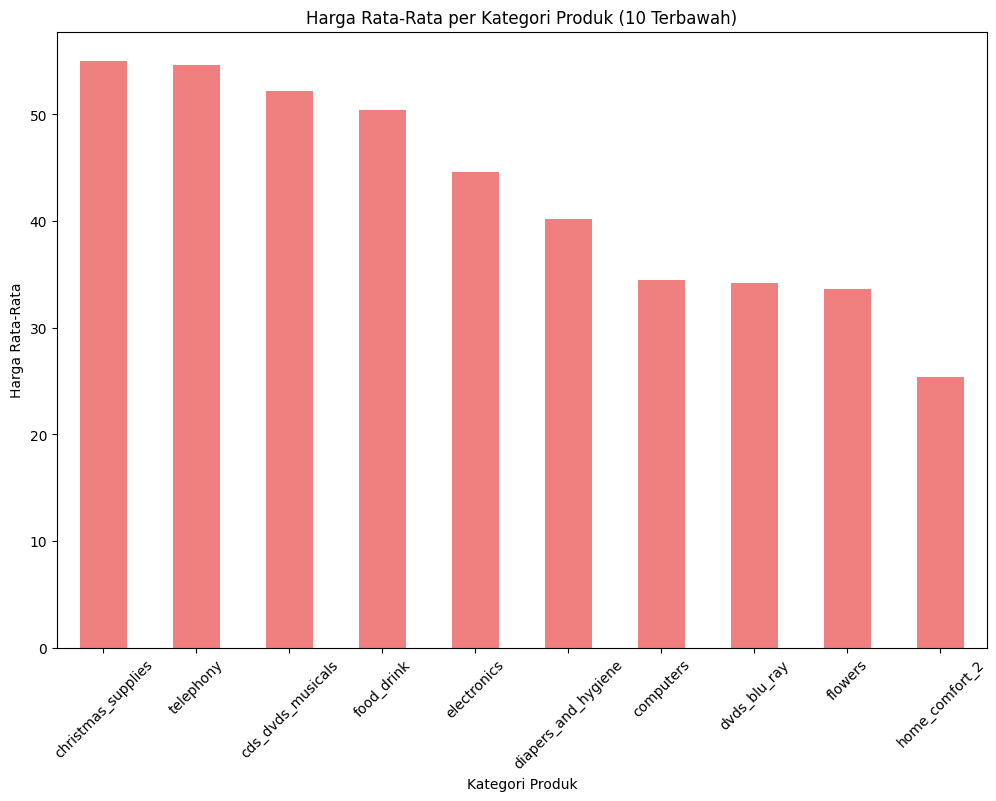


10 Kategori Produk dengan Harga Rata-Rata Terendah:
product_category_name
christmas_supplies     55.000133
telephony              54.627446
cds_dvds_musicals      52.142857
food_drink             50.397029
electronics            44.542949
diapers_and_hygiene    40.194615
computers              34.500000
dvds_blu_ray           34.189833
flowers                33.637576
home_comfort_2         25.342333
Name: price, dtype: float64


In [335]:
bottom_10_categories = avg_price_by_category.tail(10)  # 10 kategori terbawah

plt.figure(figsize=(12, 8))
bottom_10_categories.plot(kind='bar', color='lightcoral')
plt.title('Harga Rata-Rata per Kategori Produk (10 Terbawah)')
plt.xlabel('Kategori Produk')
plt.ylabel('Harga Rata-Rata')
plt.xticks(rotation=45)
plt.show()

print("\n10 Kategori Produk dengan Harga Rata-Rata Terendah:")
print(avg_price_by_category.tail(10))


### Pertanyaan 2:
**Apa saja 10 kategori produk yang paling banyak dibeli di 5 kota teratas?**

#### Mengidentifikasi 5 kota teratas

<ipython-input-336-a80ceee11a08>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_cities.index, y=top_5_cities.values, palette='viridis')


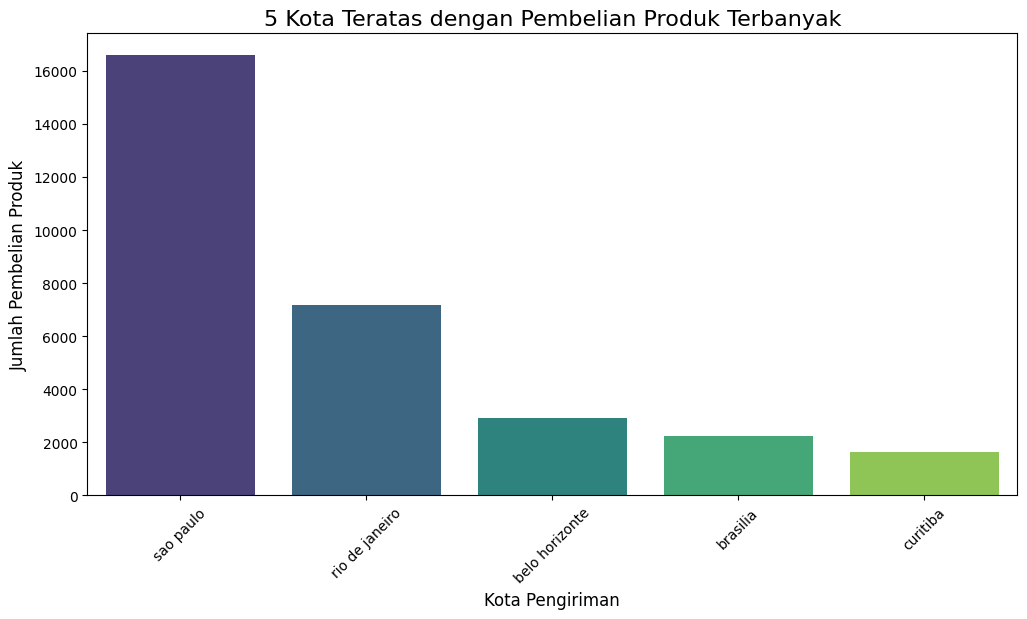

customer_city
sao paulo         16586
rio de janeiro     7164
belo horizonte     2928
brasilia           2228
curitiba           1632
Name: order_id, dtype: int64


In [336]:
# Menghitung total produk yang dibeli per kota
city_product_purchase = all_data_df.groupby('customer_city')['order_id'].count()

# Mengambil 5 kota dengan pembelian produk terbanyak
top_5_cities = city_product_purchase.nlargest(5)

# Visualisasi
plt.figure(figsize=(12, 6))
sns.barplot(x=top_5_cities.index, y=top_5_cities.values, palette='viridis')

# Menambahkan judul dan label
plt.title('5 Kota Teratas dengan Pembelian Produk Terbanyak', fontsize=16)
plt.xlabel('Kota Pengiriman', fontsize=12)
plt.ylabel('Jumlah Pembelian Produk', fontsize=12)
plt.xticks(rotation=45)

plt.show()

# Tabel jumlah pembelian produk per kota
print(top_5_cities)


#### 10 kategori produk paling banyak dibeli di kota Sao Paulo

<ipython-input-338-ef0f3ed89403>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_categories_sp.values, y=top_10_categories_sp.index, palette='viridis')


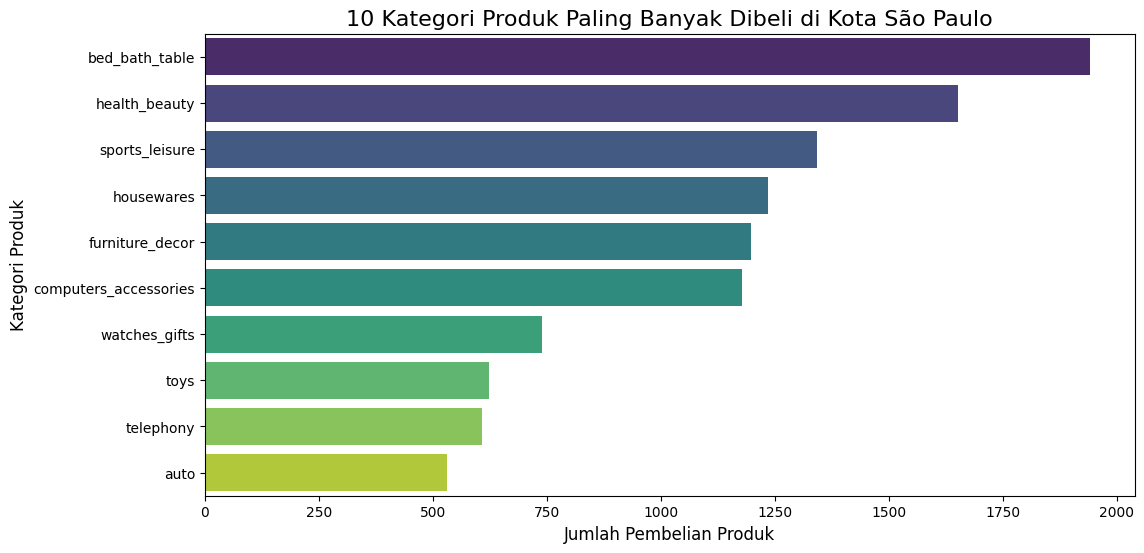

product_category_name
bed_bath_table           1942
health_beauty            1652
sports_leisure           1343
housewares               1234
furniture_decor          1198
computers_accessories    1177
watches_gifts             740
toys                      624
telephony                 607
auto                      531
Name: count, dtype: int64


In [338]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asumsikan DataFrame Anda adalah `all_df`

# Step 1: Filter data untuk hanya mencakup transaksi di kota São Paulo
sp_df = all_data_df[all_data_df['customer_city'] == 'sao paulo']

# Step 2: Menghitung jumlah pembelian per kategori produk di São Paulo
category_counts_sp = sp_df['product_category_name'].value_counts()

# Step 3: Mengambil 10 kategori produk paling banyak dibeli
top_10_categories_sp = category_counts_sp.head(10)

# Step 4: Membuat visualisasi (barplot) untuk 10 kategori produk teratas di São Paulo
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_categories_sp.values, y=top_10_categories_sp.index, palette='viridis')

# Menambahkan judul dan label
plt.title('10 Kategori Produk Paling Banyak Dibeli di Kota São Paulo', fontsize=16)
plt.xlabel('Jumlah Pembelian Produk', fontsize=12)
plt.ylabel('Kategori Produk', fontsize=12)

# Menampilkan plot
plt.show()

# Menampilkan hasil tabel jumlah pembelian untuk 10 kategori produk teratas
print(top_10_categories_sp)


#### 10 kategori produk paling banyak dibeli di kota Rio De Janeiro

<ipython-input-342-f4e6d2c6cef5>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_categories_sp.values, y=top_10_categories_sp.index, palette='viridis')


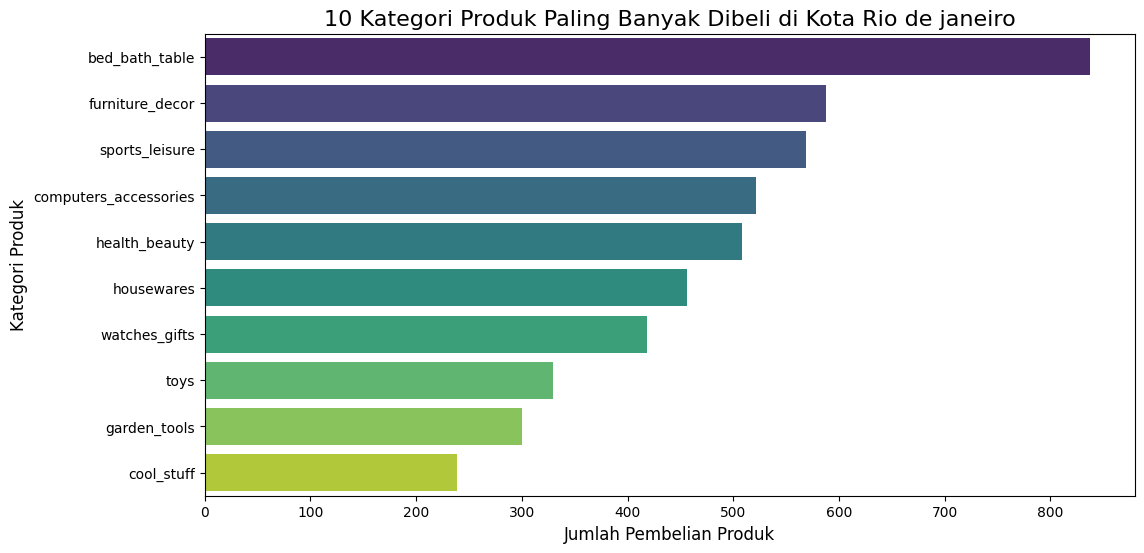

product_category_name
bed_bath_table           838
furniture_decor          588
sports_leisure           569
computers_accessories    522
health_beauty            508
housewares               456
watches_gifts            418
toys                     329
garden_tools             300
cool_stuff               239
Name: count, dtype: int64


In [342]:
# Asumsikan DataFrame Anda adalah `all_df`

# Step 1: Filter data untuk hanya mencakup transaksi di kota Rio de janeiro
sp_df = all_data_df[all_data_df['customer_city'] == 'rio de janeiro']

# Step 2: Menghitung jumlah pembelian per kategori produk di Rio de janeiro
category_counts_sp = sp_df['product_category_name'].value_counts()

# Step 3: Mengambil 10 kategori produk paling banyak dibeli
top_10_categories_sp = category_counts_sp.head(10)

# Step 4: Membuat visualisasi (barplot) untuk 10 kategori produk teratas di São Paulo
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_categories_sp.values, y=top_10_categories_sp.index, palette='viridis')

# Menambahkan judul dan label
plt.title('10 Kategori Produk Paling Banyak Dibeli di Kota Rio de janeiro', fontsize=16)
plt.xlabel('Jumlah Pembelian Produk', fontsize=12)
plt.ylabel('Kategori Produk', fontsize=12)

# Menampilkan plot
plt.show()

# Menampilkan hasil tabel jumlah pembelian untuk 10 kategori produk teratas
print(top_10_categories_sp)


#### 10 kategori produk paling banyak dibeli di kota Belo Horizonte

<ipython-input-343-f16a95399d1f>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_categories_sp.values, y=top_10_categories_sp.index, palette='viridis')


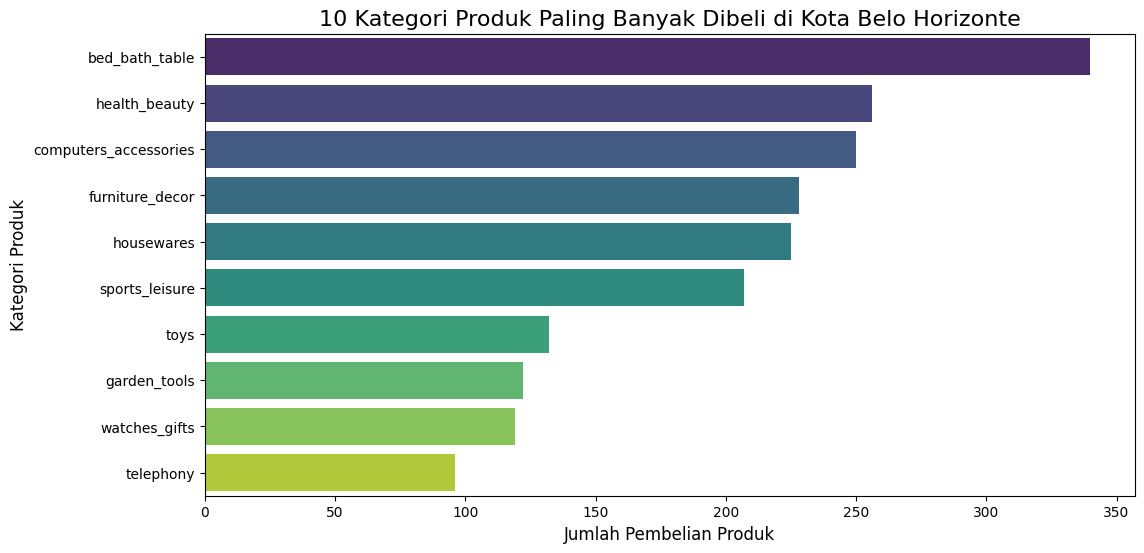

product_category_name
bed_bath_table           340
health_beauty            256
computers_accessories    250
furniture_decor          228
housewares               225
sports_leisure           207
toys                     132
garden_tools             122
watches_gifts            119
telephony                 96
Name: count, dtype: int64


In [343]:
# Asumsikan DataFrame Anda adalah `all_df`

# Step 1: Filter data untuk hanya mencakup transaksi di kota Belo Horizonte
sp_df = all_data_df[all_data_df['customer_city'] == 'belo horizonte']

# Step 2: Menghitung jumlah pembelian per kategori produk di Belo Horizonte
category_counts_sp = sp_df['product_category_name'].value_counts()

# Step 3: Mengambil 10 kategori produk paling banyak dibeli
top_10_categories_sp = category_counts_sp.head(10)

# Step 4: Membuat visualisasi (barplot) untuk 10 kategori produk teratas di Belo Horizonte
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_categories_sp.values, y=top_10_categories_sp.index, palette='viridis')

# Menambahkan judul dan label
plt.title('10 Kategori Produk Paling Banyak Dibeli di Kota Belo Horizonte', fontsize=16)
plt.xlabel('Jumlah Pembelian Produk', fontsize=12)
plt.ylabel('Kategori Produk', fontsize=12)

# Menampilkan plot
plt.show()

# Menampilkan hasil tabel jumlah pembelian untuk 10 kategori produk teratas
print(top_10_categories_sp)


#### 10 kategori produk paling banyak dibeli di kota Brasilia

<ipython-input-344-9d4fb7a50b73>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_categories_sp.values, y=top_10_categories_sp.index, palette='viridis')


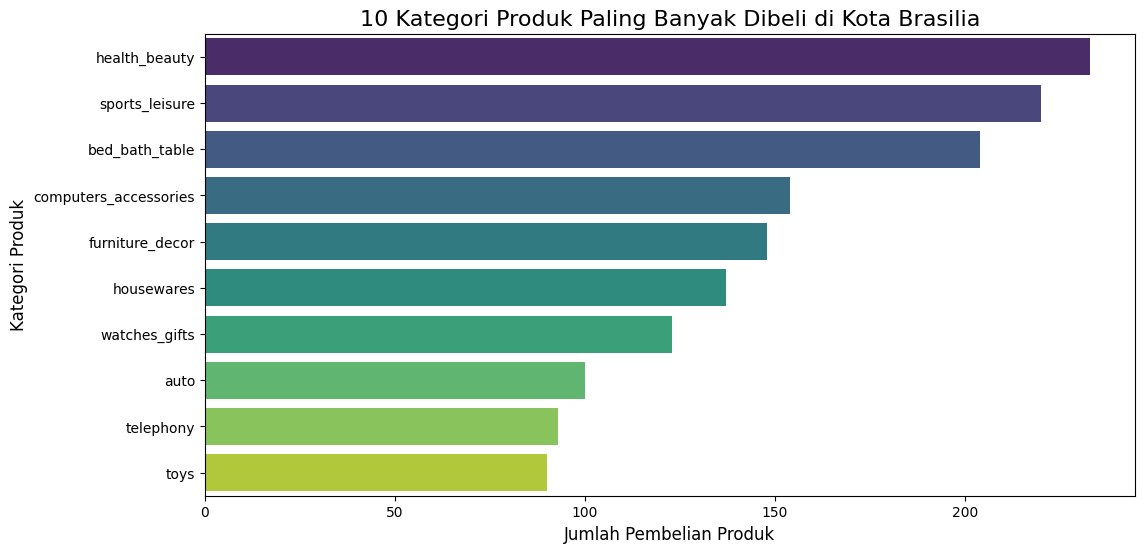

product_category_name
health_beauty            233
sports_leisure           220
bed_bath_table           204
computers_accessories    154
furniture_decor          148
housewares               137
watches_gifts            123
auto                     100
telephony                 93
toys                      90
Name: count, dtype: int64


In [344]:
# Asumsikan DataFrame Anda adalah `all_df`

# Step 1: Filter data untuk hanya mencakup transaksi di kota Brasilia
sp_df = all_data_df[all_data_df['customer_city'] == 'brasilia']

# Step 2: Menghitung jumlah pembelian per kategori produk di Brasilia
category_counts_sp = sp_df['product_category_name'].value_counts()

# Step 3: Mengambil 10 kategori produk paling banyak dibeli
top_10_categories_sp = category_counts_sp.head(10)

# Step 4: Membuat visualisasi (barplot) untuk 10 kategori produk teratas di Brasilia
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_categories_sp.values, y=top_10_categories_sp.index, palette='viridis')

# Menambahkan judul dan label
plt.title('10 Kategori Produk Paling Banyak Dibeli di Kota Brasilia', fontsize=16)
plt.xlabel('Jumlah Pembelian Produk', fontsize=12)
plt.ylabel('Kategori Produk', fontsize=12)

# Menampilkan plot
plt.show()

# Menampilkan hasil tabel jumlah pembelian untuk 10 kategori produk teratas
print(top_10_categories_sp)


#### 10 kategori produk paling banyak dibeli di kota Curitiba

<ipython-input-345-cd52a442526b>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_categories_sp.values, y=top_10_categories_sp.index, palette='viridis')


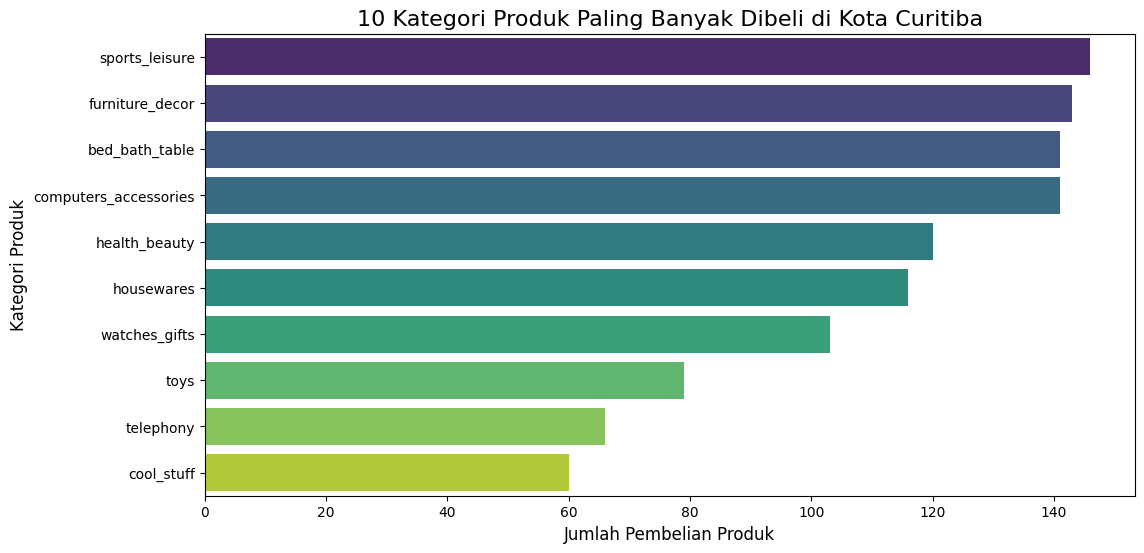

product_category_name
sports_leisure           146
furniture_decor          143
bed_bath_table           141
computers_accessories    141
health_beauty            120
housewares               116
watches_gifts            103
toys                      79
telephony                 66
cool_stuff                60
Name: count, dtype: int64


In [345]:
# Asumsikan DataFrame Anda adalah `all_df`

# Step 1: Filter data untuk hanya mencakup transaksi di kota Curitiba
sp_df = all_data_df[all_data_df['customer_city'] == 'curitiba']

# Step 2: Menghitung jumlah pembelian per kategori produk di Curitiba
category_counts_sp = sp_df['product_category_name'].value_counts()

# Step 3: Mengambil 10 kategori produk paling banyak dibeli
top_10_categories_sp = category_counts_sp.head(10)

# Step 4: Membuat visualisasi (barplot) untuk 10 kategori produk teratas di Curitiba
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_categories_sp.values, y=top_10_categories_sp.index, palette='viridis')

# Menambahkan judul dan label
plt.title('10 Kategori Produk Paling Banyak Dibeli di Kota Curitiba', fontsize=16)
plt.xlabel('Jumlah Pembelian Produk', fontsize=12)
plt.ylabel('Kategori Produk', fontsize=12)

# Menampilkan plot
plt.show()

# Menampilkan hasil tabel jumlah pembelian untuk 10 kategori produk teratas
print(top_10_categories_sp)


### **Insight:**
- Segment pelanggan dengan nilai monetary rendah namun frekuensi pembelian tinggi harus diberi insentif untuk meningkatkan nilai pembelian mereka, seperti memberikan penawaran bundling atau diskon pada pembelian berikutnya.
- Pelanggan dengan recency rendah dan frequency tinggi mungkin perlu diberikan tawaran khusus atau reminder untuk melakukan pembelian lagi dalam waktu dekat.

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1
Strategi Pemasaran Berdasarkan Harga:
Produk dengan harga tinggi dapat dipasarkan melalui saluran yang menekankan kualitas, eksklusivitas, dan keandalan produk. Misalnya, menggunakan influencer atau iklan yang berfokus pada gaya hidup.
Produk dengan harga rendah dapat difokuskan pada volume penjualan yang tinggi dan promosi seperti diskon atau bundling untuk meningkatkan penetrasi pasar.

- Conclution pertanyaan 2
Strategi Pemasaran Berdasarkan Kategori Populer:
Personalisasi Penawaran Berdasarkan Kota: Produk yang paling banyak dibeli di setiap kota dapat memberi tahu perusahaan untuk menyesuaikan iklan dan promosi. Misalnya, di kota besar seperti Sao Paulo, bisa fokus pada iklan untuk produk teknologi atau fashion dengan menawarkan potongan harga atau pengiriman gratis. Sedangkan di kota yang lebih kecil atau menengah seperti Curibita, fokus pada produk rumah tangga atau makanan khas lokal